# *Caso de Estudio Nhanes* #

El Estudio Nacional de Examen de Salud y Nutrición (National Health and Nutrition Examination Survey, NHANES) es un programa de encuestas diseñado para evaluar la salud y el estado nutricional de adultos y niños en los Estados Unidos. A través de entrevistas y exámenes físicos, NHANES recopila datos que ayudan a comprender las condiciones prevalentes en la población, como enfermedades crónicas, deficiencias nutricionales, y problemas de salud mental, incluyendo la depresión y otras condiciones a través de cuestionarios y registro de examinaciones físicas y de laboratorio.

## Fase 1: Business Understanding

### Importación de librerias y datasets

Importamos las siguientes librerías esenciales para el análisis de datos y la manipulación en este proyecto:

Kedro para gestionar flujos de trabajo en el notebook.

Pandas y NumPy para la manipulación de datos.

Matplotlib y Seaborn para visualizaciones.

Scipy para estadística avanzada.

Scikit-learn para escalado, imputación y transformación de datos.

In [1]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mstats
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
scaler = StandardScaler()
minmax = MinMaxScaler()
pt = PowerTransformer(method='yeo-johnson')
pd.options.display.float_format = '{:.2f}'.format

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


Se cargan los conjuntos de datos relevantes para el análisis, que abarcan información demográfica, biomarcadores, y otros factores de interés. A continuación se describen los datos y las técnicas de transformación que se aplicarán:

demografía: Contiene datos sociodemográficos de los participantes.

insulina: Datos de mediciones de insulina en sangre.

colesterol: Información sobre los niveles de colesterol.

depresión: Datos relacionados con el estado depresivo de los participantes.

proteína C: Datos sobre los niveles de proteína C reactiva.

perfil bioquímico: Información general sobre el perfil bioquímico de los participantes.

presión arterial: Mediciones de la presión arterial sistólica y diastólica de los participantes.

medidas corporales: Datos sobre medidas físicas como peso, altura, índice de masa corporal (IMC), y circunferencia de la cintura.







Además, se utilizan diferentes técnicas de transformación de datos para su estandarización y escalado:

StandardScaler: Escalado estándar de las variables para normalizar los datos.

MinMaxScaler: Escalado para transformar las variables a un rango específico.

PowerTransformer: Transformación de potencia Yeo-Johnson para mejorar la normalidad de los datos.

In [2]:
demografia = catalog.load("demografia")
insulina = catalog.load("insulina")
colesterol = catalog.load("colesterol")
depresion = catalog.load("depresion")
proteinaC = catalog.load("proteinaC")
perfilB = catalog.load("perfilBioquimico")
presion = catalog.load("presionArterial")
medidas = catalog.load("medidasCorporales")

[09/10/24 12:08:16] INFO     Loading data from demografia (ParquetDataset)...                   ]8;id=988598;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=37668;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

[09/10/24 12:08:24] INFO     Loading data from insulina (ParquetDataset)...                     ]8;id=392201;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=721514;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from colesterol (ParquetDataset)...                   ]8;id=489530;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=232279;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from depresion (ParquetDataset)...                    ]8;id=893630;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=246281;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from proteinaC (ParquetDataset)...                    ]8;id=435508;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=479046;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from perfilBioquimico (ParquetDataset)...             ]8;id=972995;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=181834;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from presionArterial (ParquetDataset)...              ]8;id=295133;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=523075;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from medidasCorporales (ParquetDataset)...            ]8;id=262958;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=277561;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

### Descripción de variables

En esta sección, se verá el tipo de dato existente por cada columna de cada dataframe

In [3]:
dataframes = {
    'demografia': demografia,
    'insulina': insulina,
    'colesterol': colesterol,
    'depresion': depresion,
    'proteinaC': proteinaC,
    'perfilBioquimico': perfilB,
    'presionArterial': presion,
    'medidasCorporales': medidas
}
for df in dataframes:
    print(f"----------------------- Dataframe {df} -----------------------")
    for columna in dataframes[df]:
        if dataframes[df][columna].dtype == int:
            print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
        elif dataframes[df][columna].dtype == float:
            print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
        elif dataframes[df][columna].dtype == object:
            print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
        elif dataframes[df][columna].dtype == bool:
            print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")
    print(f"------------------------------------------------------------")

----------------------- Dataframe demografia -----------------------
Columna ID ------ Tipo de variable: Cuantitativa continua
Columna Ciclo de liberación de datos ------ Tipo de variable: Cuantitativa continua
Columna Estado de entrevista/examen ------ Tipo de variable: Cuantitativa continua
Columna Género ------ Tipo de variable: Cuantitativa continua
Columna Edad en años al momento del examen ------ Tipo de variable: Cuantitativa continua
Columna Edad en meses al momento del examen - 0 a 24 meses ------ Tipo de variable: Cuantitativa continua
Columna Raza/Origen hispano ------ Tipo de variable: Cuantitativa continua
Columna Raza/Origen hispano con asiáticos no hispanos ------ Tipo de variable: Cuantitativa continua
Columna Período de seis meses ------ Tipo de variable: Cuantitativa continua
Columna País de nacimiento ------ Tipo de variable: Cuantitativa continua
Columna Tiempo en los EE.UU. ------ Tipo de variable: Cuantitativa continua
Columna Nivel educativo - Adultos 20+ ------ 

### Preguntas de investigación

Dada las variables presentes en los diferentes datasets, se pueden realizar algunas preguntas para su futura investigación.

1. ¿Cuál es el impacto de la circunferencia de la cintura en los niveles de lípidos en suero?

2. ¿Cómo varían los niveles de lípidos y glucosa en función de la edad, y cuáles son los grupos etarios más vulnerables a trastornos metabólicos?

3. ¿Cómo afecta el género y la edad en las correlaciones de estos biomarcadores?

4. ¿Qué relación existe entre los niveles de electrolitos y las funciones corporales básicas como la presión arterial y la función renal?

5. A medida que la edad aumenta, ¿Afecta esto en los resultados de la insulina y el colesterol en la sangre?

6. A mayor nivel de índice de pobreza, ¿Aumenta esto el nivel de sintomatía depresiva?

### Targets para las preguntas

Para el caso de la pregunta número 1, el target de regresión sería: "Colesterol Total, suero refrigerado (mg/dL)". Las variables con las cuales se podría predecir el colesterol son: "Circunferencia de la cintura (cm)" y "Edad". Otros factores pueden ser el IMC y el peso.

Para la pregunta 2, se puede usar un target de clasificación, el cual será el grupo etario, como por ejemplo pre infante, infante, niño, adolescente, etc. Otro target de clasificación podría ser el nivel de riesgo, como bajo, medio, alto. Las variables con las cuales se puede predecir el primer target podría ser: "Triglicéridos, suero refrigerado (mg/dL)", "Colesterol Total, suero refrigerado (mg/dL)", "Glucosa, suero refrigerado (mg/dL)", "Circunferencia de la cintura (cm)", "IMC". En cuanto al segundo, podrían ser los mismos, incluyendo la edad como variable.

### Valores referenciales de las Variables estudiadas ###


#### 1- Impacto de la circunferencia de la cintura en los niveles de lípidos en suero ####
**Variables de laboratorio:**

*Triglicéridos, suero refrigerado (mg/dL):*

Normal: < 150 mg/dL.

Límite alto: 150–199 mg/dL.

Alto: 200–499 mg/dL.

Muy alto: ≥ 500 mg/dL.

*Colesterol Total, suero refrigerado (mg/dL):*

Deseable: < 200 mg/dL.

Límite alto: 200–239 mg/dL.

Alto: ≥ 240 mg/dL.

*HDL (colesterol bueno):*

Normal:

Hombres: > 40 mg/dL.

Mujeres: > 50 mg/dL.

Bajo:

Hombres: < 40 mg/dL.

Mujeres: < 50 mg/dL.

*LDL (colesterol malo):*

Óptimo: < 100 mg/dL.

Casi óptimo/por encima del óptimo: 100–129 mg/dL.

Alto: 160–189 mg/dL.

Muy alto: ≥ 190 mg/dL.

**Clasificación de riesgo de dislipidemia:**

Normal: Colesterol total < 200 mg/dL, LDL < 130 mg/dL, Triglicéridos < 150 mg/dL.

Alto riesgo: Colesterol total ≥ 240 mg/dL, LDL ≥ 160 mg/dL, Triglicéridos ≥ 200 mg/dL.

#### 2- Variación de lípidos y glucosa en función de la edad ####

**Variables de laboratorio:**

*Glucosa en ayunas (mg/dL):*

Normal: 70–99 mg/dL.

Prediabetes: 100–125 mg/dL.

Diabetes: ≥ 126 mg/dL.

*Triglicéridos, suero refrigerado (mg/dL):* Mismos rangos mencionados en la primera pregunta.

*Colesterol Total, suero refrigerado (mg/dL):* Mismos rangos mencionados en la primera pregunta.

**Clasificación de riesgo metabólico:**

Normal: Glucosa < 100 mg/dL, Triglicéridos < 150 mg/dL, Colesterol total < 200 mg/dL.

Prediabetes: Glucosa entre 100–125 mg/dL.

Diabetes: Glucosa ≥ 126 mg/dL o niveles elevados de lípidos.

#### 3- Influencia del género y la edad en los biomarcadores ####

**Variables de laboratorio:**

*Glucosa, suero refrigerado (mg/dL):* Mismos valores mencionados en la pregunta anterior.

*Triglicéridos, suero refrigerado (mg/dL):* Mismos valores mencionados en la pregunta anterior.

*Colesterol Total, suero refrigerado (mg/dL):* Mismos valores mencionados en la pregunta anterior.

**Clasificación de riesgo cardiovascular o metabólico:**

Normal: Glucosa, colesterol total y triglicéridos dentro de los valores normales según género y edad.

Alto riesgo: Valores por encima del umbral normal para cualquiera de las variables, combinado con género o edad avanzada.

#### 4- Relación entre niveles de electrolitos y funciones corporales ####

**Variables de laboratorio:**

*Presión arterial:*

Normal:

Presión sistólica: < 120 mmHg.

Presión diastólica: < 80 mmHg.

*Prehipertensión:*

Sistólica: 120–139 mmHg.

Diastólica: 80–89 mmHg.

*Hipertensión estadio 1:*

Sistólica: 140–159 mmHg.

Diastólica: 90–99 mmHg.

*Hipertensión estadio 2:*

Sistólica: ≥ 160 mmHg.

Diastólica: ≥ 100 mmHg.

*Creatinina, suero refrigerado (mg/dL):*

Hombres: 0.6–1.2 mg/dL.

Mujeres: 0.5–1.1 mg/dL.

*Nitrógeno ureico en sangre (mg/dL):*

Normal: 6–20 mg/dL.

Anormal:
Por encima: Indica daño renal o enfermedad renal.

*Sodio (mmol/L):*

Normal: 135–145 mmol/L.

Hiponatremia: < 135 mmol/L.

Hipernatremia: > 145 mmol/L.

*Potasio (mmol/L):*

Normal: 3.5–5.0 mmol/L.

Hipopotasemia: < 3.5 mmol/L.

Hipercalemia: > 5.0 mmol/L.

*Fósforo (mmol/L):*

Normal: 0.8–1.5 mmol/L.

Hipofosfatemia: < 0.8 mmol/L.

Hiperfosfatemia: > 1.5 mmol/L.

**Clasificación de riesgo:**

Riesgo de hipertensión o disfunción renal: Presión arterial o creatinina fuera del rango normal.

#### 5- Edad y sus efectos sobre la insulina y el colesterol ####

**Variables de laboratorio:**

*Insulina en ayunas:*

Normal: 3–25 µU/mL.

Hiperinsulinemia: > 25 µU/mL.

*Colesterol Total, suero refrigerado (mg/dL):* Mismos valores mencionados en la primera pregunta.

*Triglicéridos, suero refrigerado (mg/dL):* Mismos valores mencionados en la primera pregunta.

*Glucosa,* suero refrigerado (mg/dL): Mismos valores mencionados en la segunda pregunta.

**Clasificación de riesgo:**

*Riesgo de hipercolesterolemia o resistencia a la insulina:* Colesterol o triglicéridos elevados, insulina por encima del rango normal.


## Fase 2: Data Understanding

En esta fase, se realiza una exploración exhaustiva de los datos para entender sus características, distribuciones y calidad. Los principales datasets que se analizan incluyen:

**demografía:** Datos sociodemográficos de los participantes, como edad, género y educación.

**insulina:** Niveles de insulina en sangre.

**colesterol:** Mediciones de colesterol total.

**depresión:** Información sobre el estado emocional de los participantes, incluyendo indicadores de depresión.

**proteína C:** Niveles de proteína C reactiva, un marcador inflamatorio.

**perfil bioquímico:** Datos generales sobre el perfil bioquímico, como albúmina, fosfatasa alcalina y otros biomarcadores.

**presión arterial:** Mediciones de la presión arterial sistólica y diastólica de los participantes.

**medidas corporales:** Datos sobre medidas físicas como peso, altura, índice de masa corporal (IMC), y circunferencia de la cintura.

### Verificación de datos nulos y posibles errores en DataFrame

In [4]:
for df in dataframes:
    print(f"----------------------- Dataframe {df} -----------------------\n")
    print("Cantidad de datos nulos:")
    print(dataframes[df].isnull().sum())
    print(f"------------------------------------------------------------\n")

----------------------- Dataframe demografia -----------------------

Cantidad de datos nulos:
ID                                                                  0
Ciclo de liberación de datos                                        0
Estado de entrevista/examen                                         0
Género                                                              0
Edad en años al momento del examen                                  0
Edad en meses al momento del examen - 0 a 24 meses              14573
Raza/Origen hispano                                                 0
Raza/Origen hispano con asiáticos no hispanos                       0
Período de seis meses                                            1260
País de nacimiento                                                  0
Tiempo en los EE.UU.                                            12532
Nivel educativo - Adultos 20+                                    6328
Estado civil                                                     

### Medidas de Posición

In [5]:
# Medidas de dispersión de todos los datos
for df in dataframes:
    print(f"----------------------- Dataframe {df} -----------------------\n")
    for dato in dataframes[df].columns:
        try:
          if dataframes[df][dato].dtype in [int,float]:
            print(f"La media de la columna {dato} es: {dataframes[df][dato].mean()} - La moda es: {dataframes[df][dato].mode()[0]} - La mediana es: {dataframes[df][dato].median()} - La desviación estándar es: {dataframes[df][dato].std()}\n")
          elif dataframes[df][dato].dtype in [object, bool, str]:
            print(f"En la columna {dato}, existen {dataframes[df][dato].unique().size} dato/s. Los datos son: {dataframes[df][dato].unique()}. El que más se repite es {dataframes[df][dato].value_counts().index[0]} con {dataframes[df][dato].value_counts().iloc[0]} repeticiones.\n")
        except:
            print(f"La columna {dato} tiene problemas (posible NaN)\n")
    print(f"------------------------------------------------------------\n")

----------------------- Dataframe demografia -----------------------

La media de la columna ID es: 117042.5 - La moda es: 109263.0 - La mediana es: 117042.5 - La desviación estándar es: 4491.929429543612

La media de la columna Ciclo de liberación de datos es: 66.0 - La moda es: 66.0 - La mediana es: 66.0 - La desviación estándar es: 0.0

La media de la columna Estado de entrevista/examen es: 1.9190231362467867 - La moda es: 2.0 - La mediana es: 2.0 - La desviación estándar es: 0.27280834728554343

La media de la columna Género es: 1.5037917737789204 - La moda es: 2.0 - La mediana es: 2.0 - La desviación estándar es: 0.5000016893953748

La media de la columna Edad en años al momento del examen es: 33.742480719794344 - La moda es: 80.0 - La mediana es: 30.0 - La desviación estándar es: 25.32053162853326

La media de la columna Edad en meses al momento del examen - 0 a 24 meses es: 10.518743667679837 - La moda es: 4.0 - La mediana es: 10.0 - La desviación estándar es: 7.0794107118120495

### Graficos

Para comprender mejor estos conjuntos de datos, se aplican las siguientes técnicas:
Histogramas, gráficos y heatmaps para identificar posibles correlaciones y tendencias.

----------------------- Dataframe demografia -----------------------



[09/10/24 12:08:25] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=273087;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=239111;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

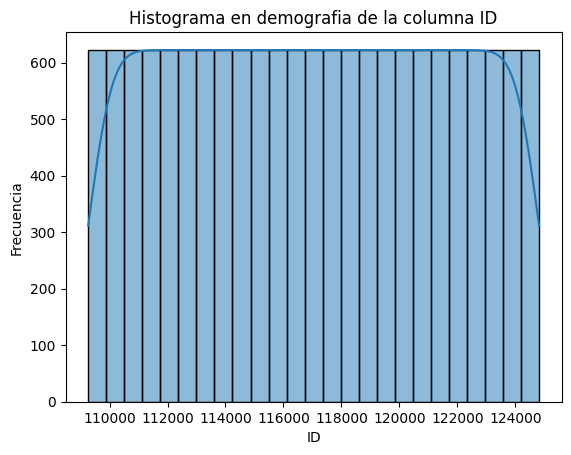

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=659931;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=700081;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

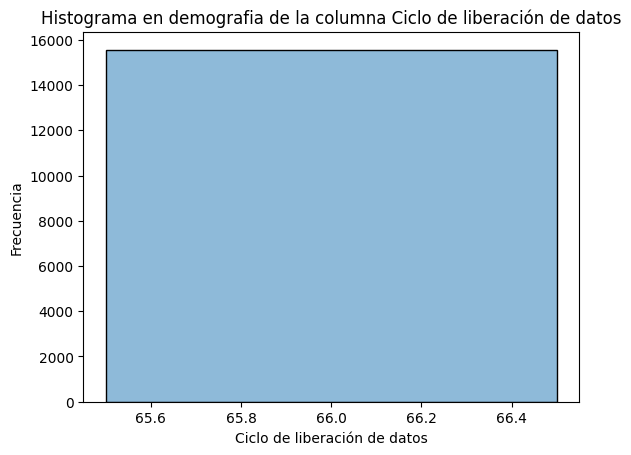

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=500570;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=96979;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

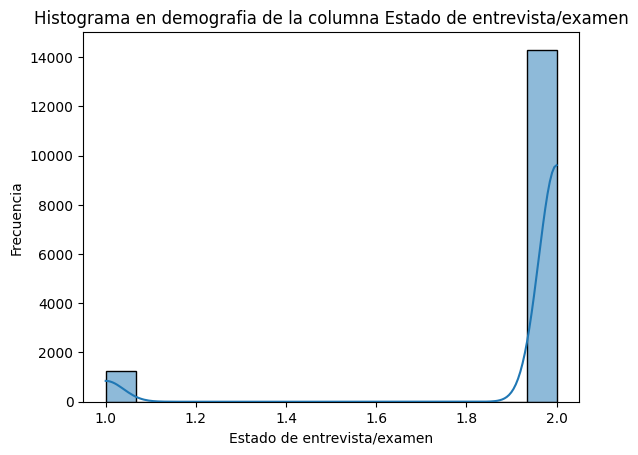

[09/10/24 12:08:26] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=758415;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=66588;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

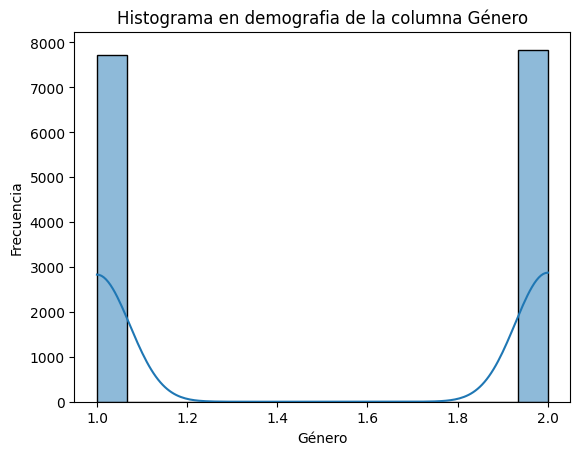

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=304995;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=384552;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

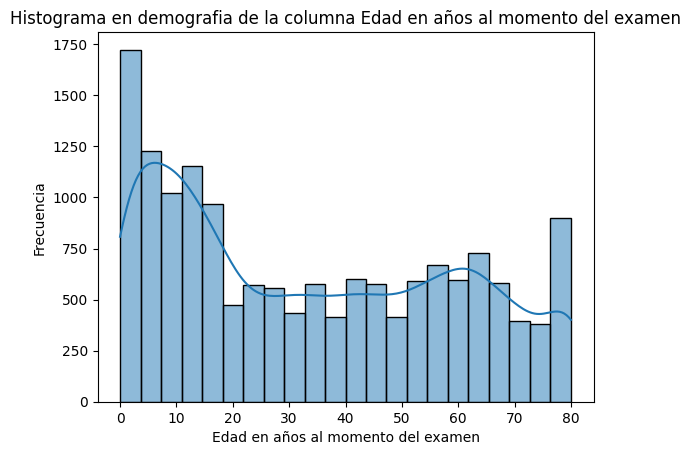

[09/10/24 12:08:27] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=640145;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=402958;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

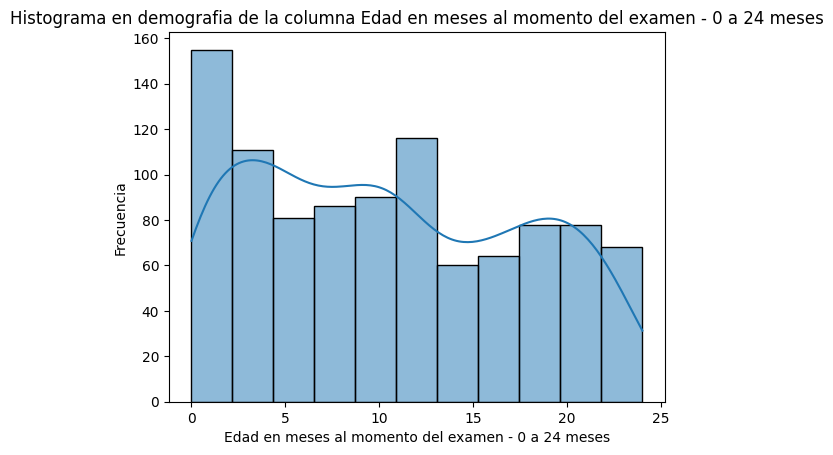

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=767443;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=650531;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

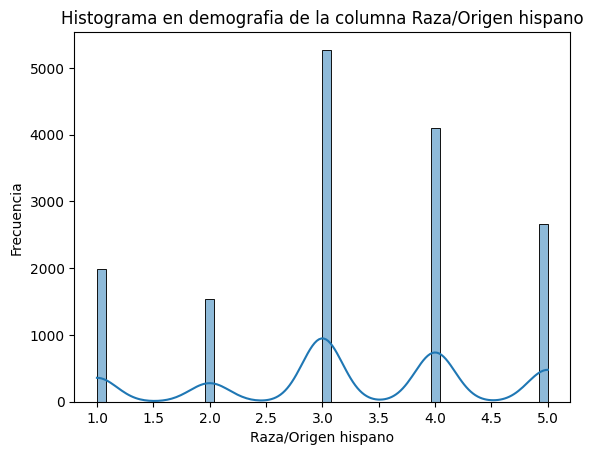

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=614158;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=664679;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

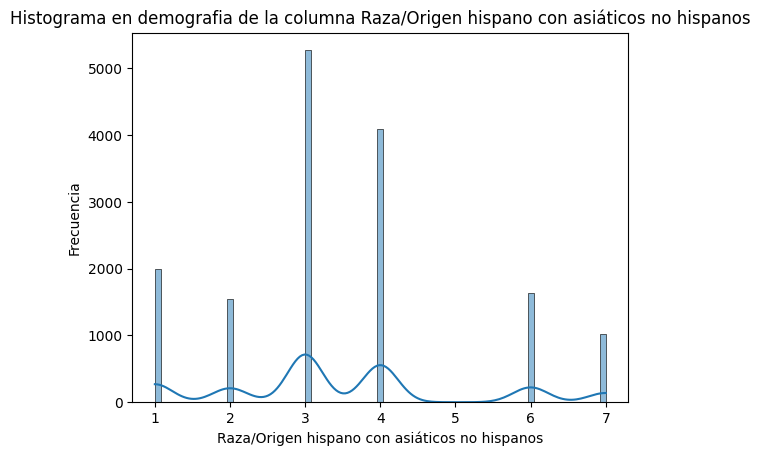

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=545726;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=376740;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

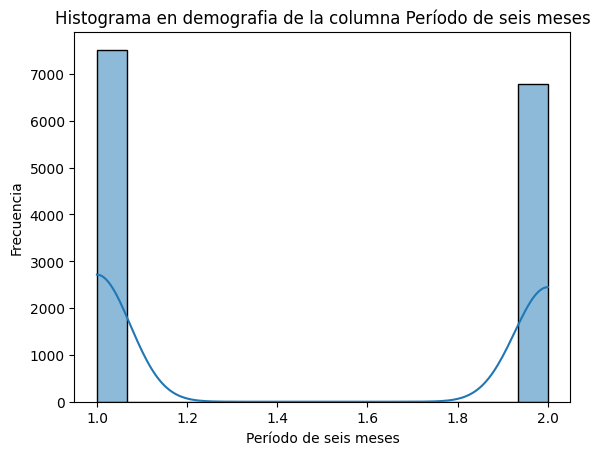

[09/10/24 12:08:28] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=716264;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=880898;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

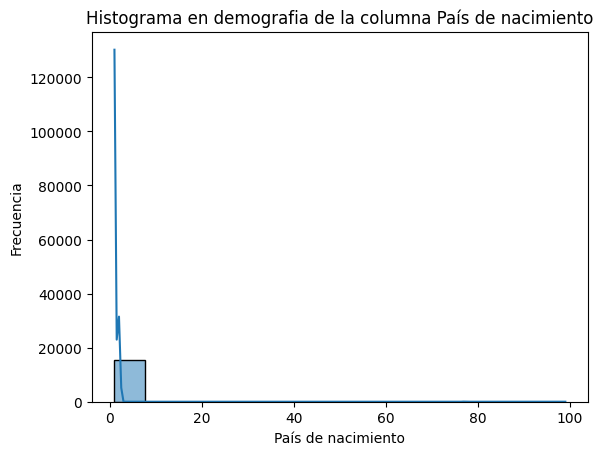

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=801974;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=365709;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

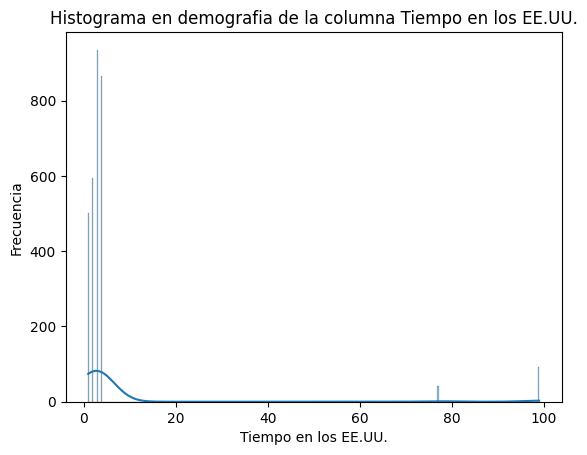

[09/10/24 12:08:29] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=795824;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=691314;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

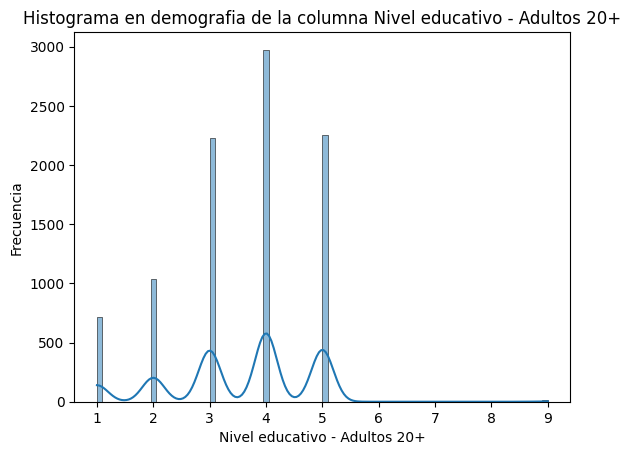

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=691733;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=225133;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

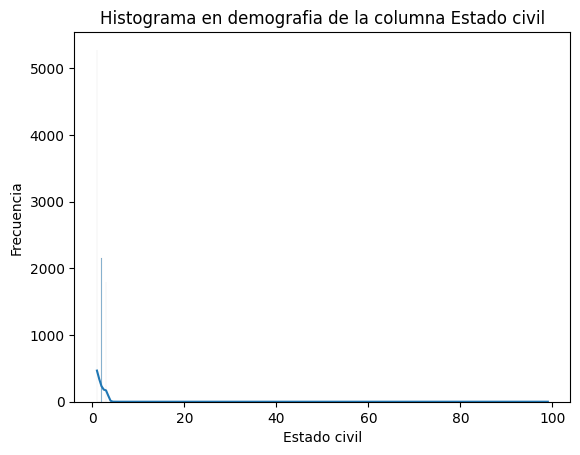

[09/10/24 12:08:30] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=998437;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=728933;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

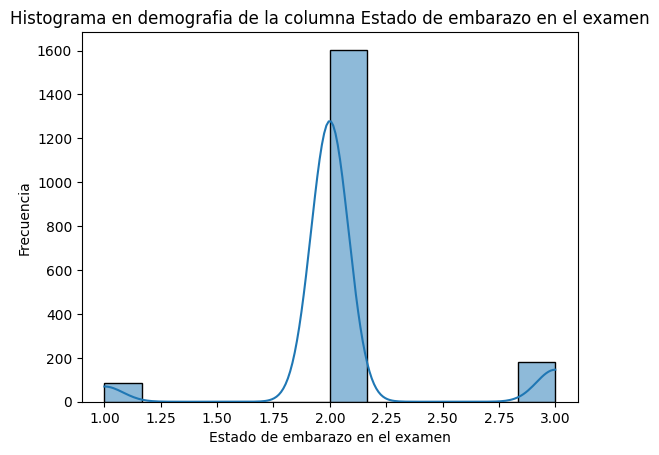

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=807664;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=808915;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

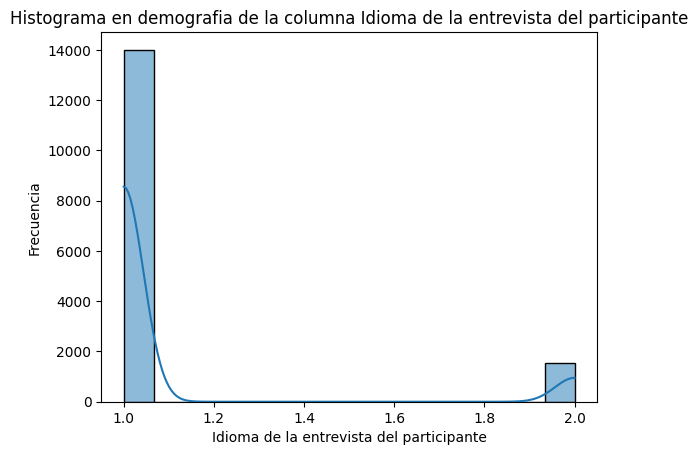

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=27478;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=606829;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

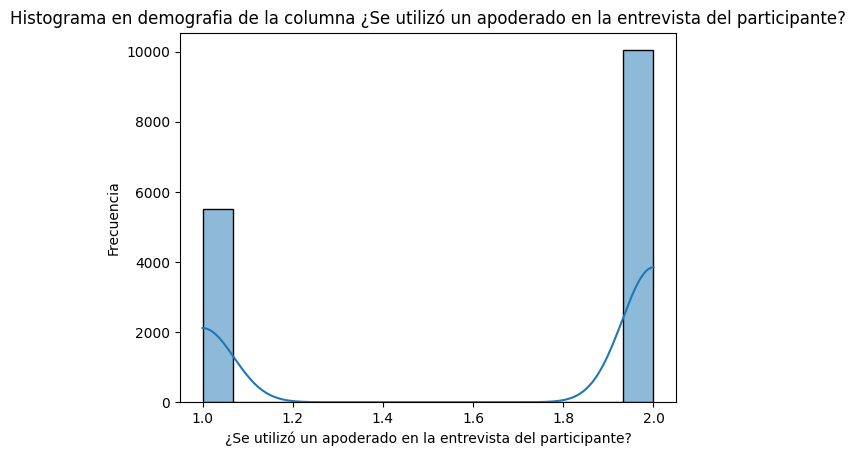

[09/10/24 12:08:31] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=92202;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=601700;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

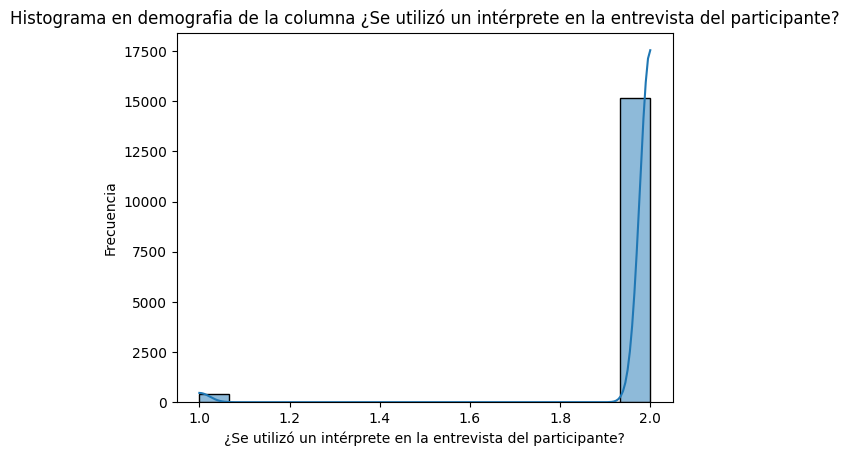

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=510052;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=366919;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

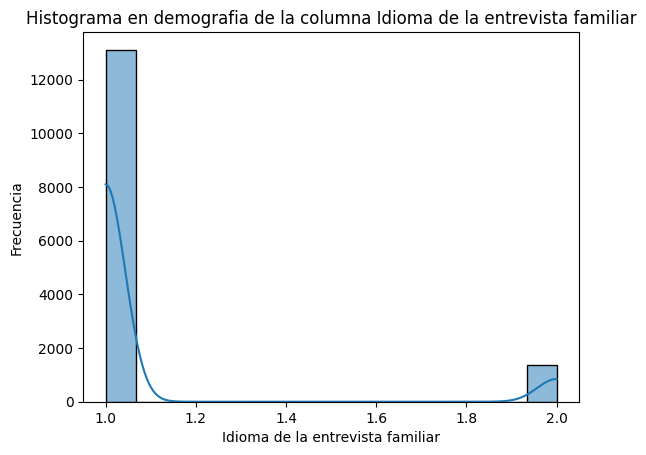

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=382074;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=175011;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

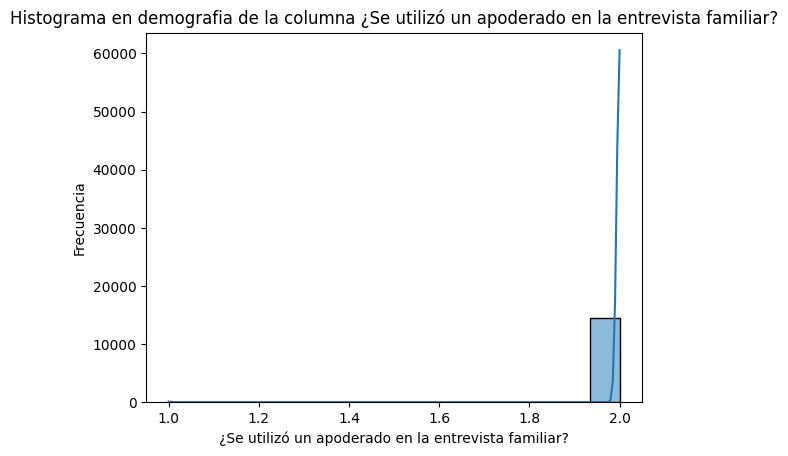

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=585391;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=765546;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

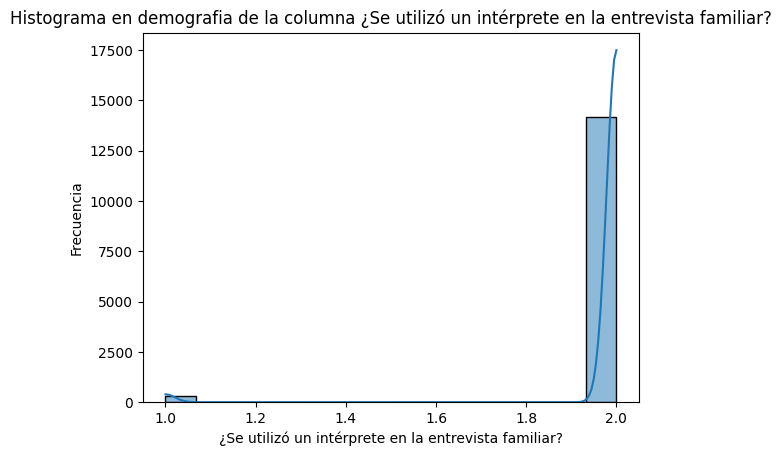

[09/10/24 12:08:32] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=742340;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=115732;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

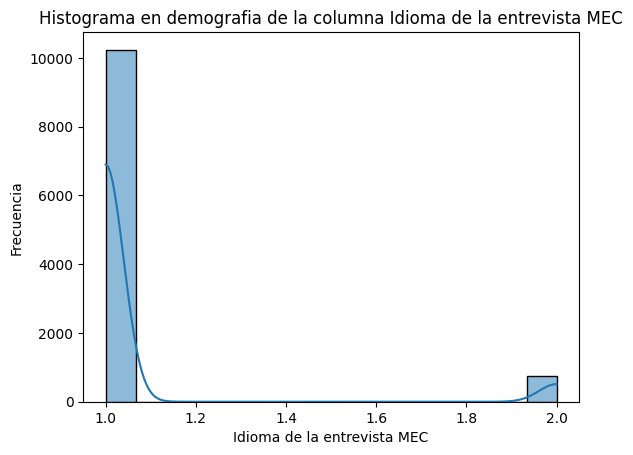

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=468274;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=334908;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

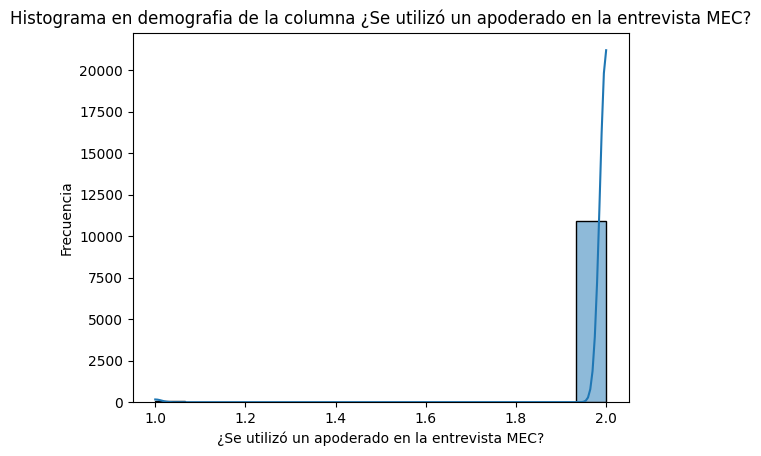

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=448427;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=755605;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

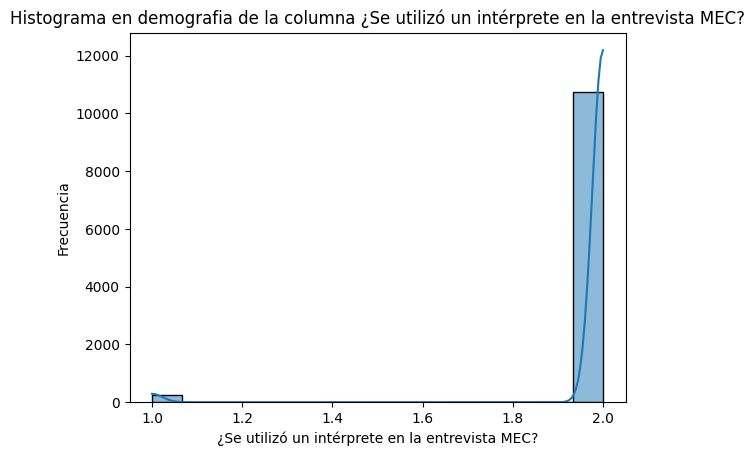

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=340432;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=144486;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

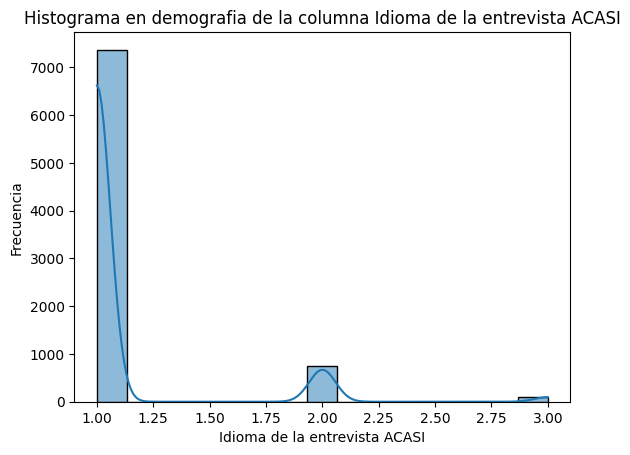

[09/10/24 12:08:33] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=464214;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=893596;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

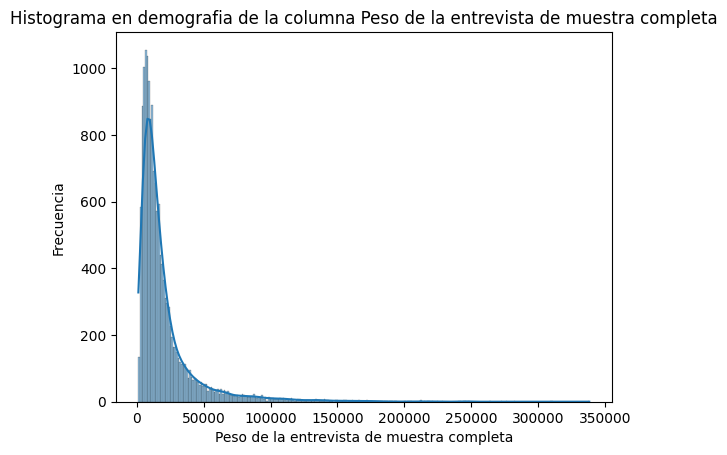

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=342196;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=889569;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

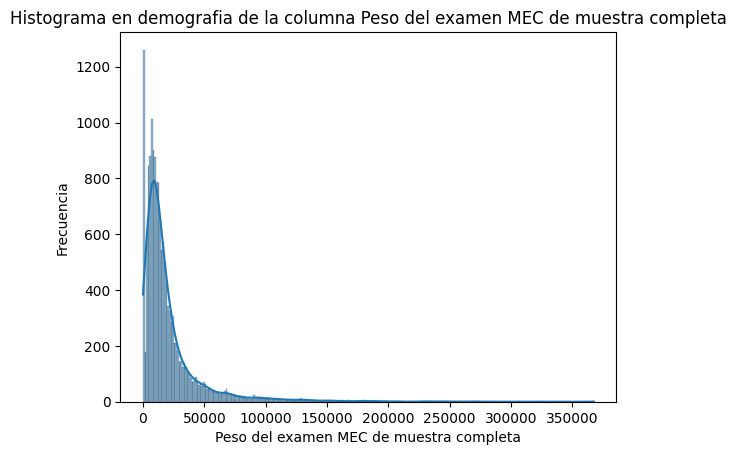

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=367543;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=973317;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

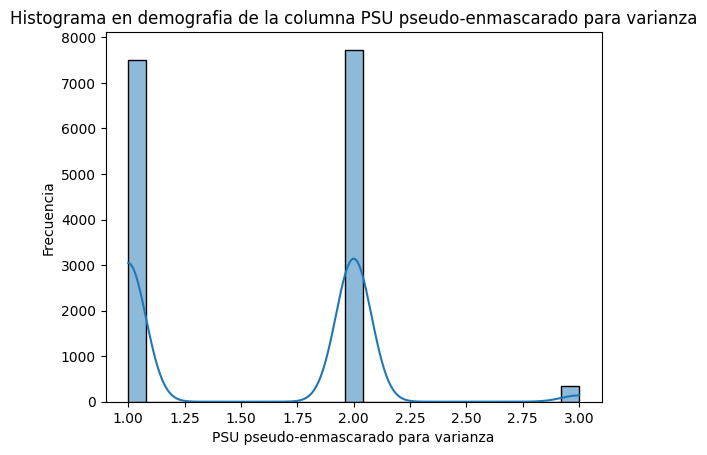

[09/10/24 12:08:34] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=604663;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=395300;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

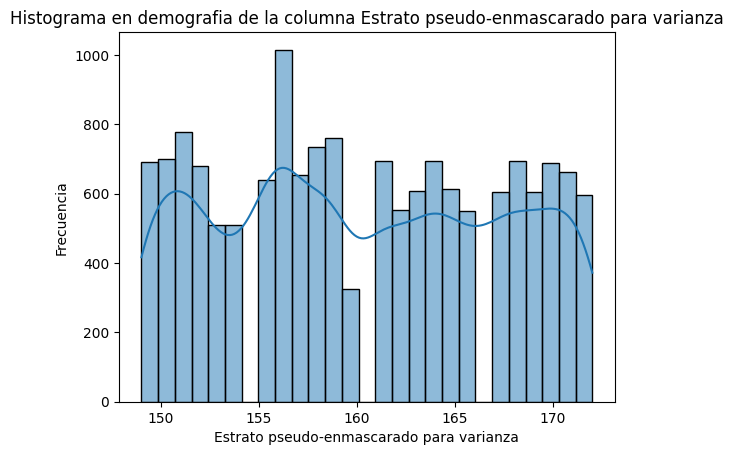

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=321575;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=693165;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

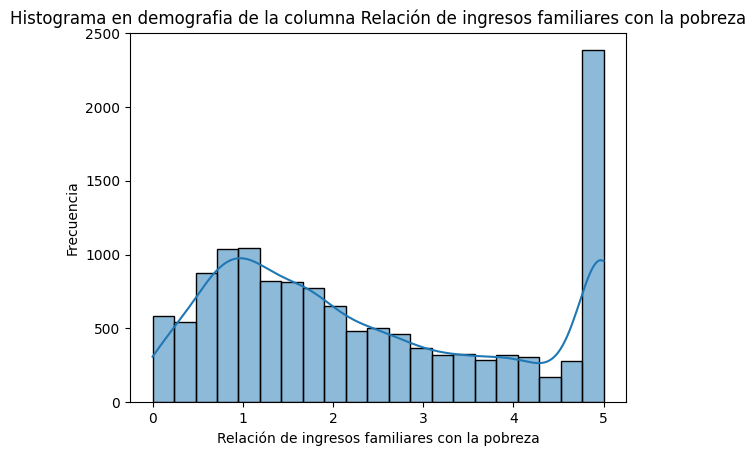

------------------------------------------------------------

----------------------- Dataframe insulina -----------------------



                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=510288;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=653193;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

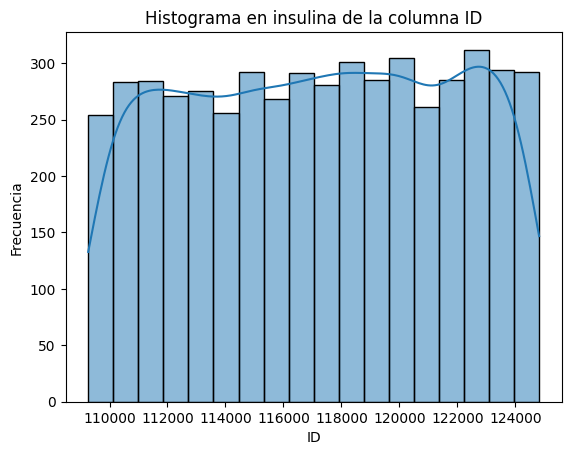

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=946179;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=722556;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

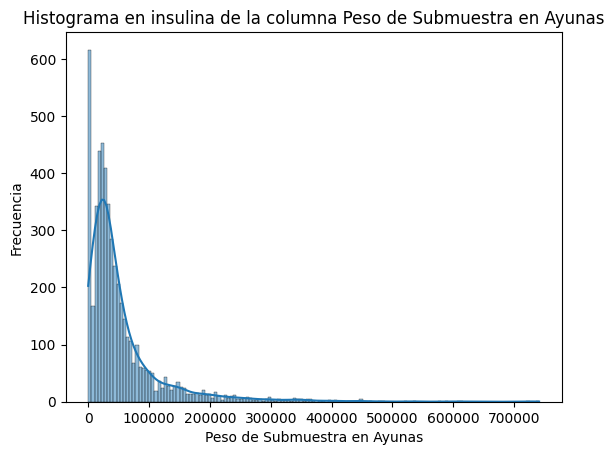

[09/10/24 12:08:35] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=19104;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=250710;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

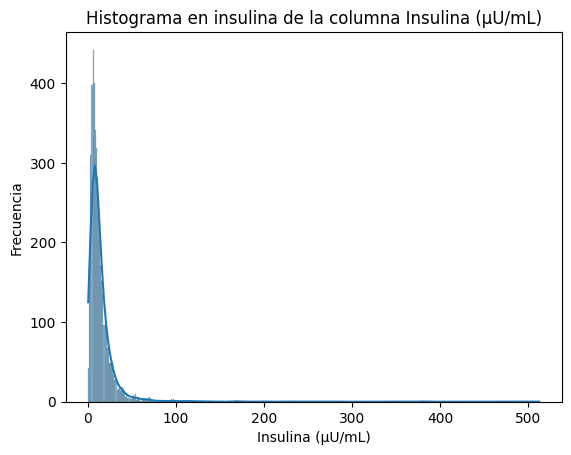

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=870117;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=68276;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

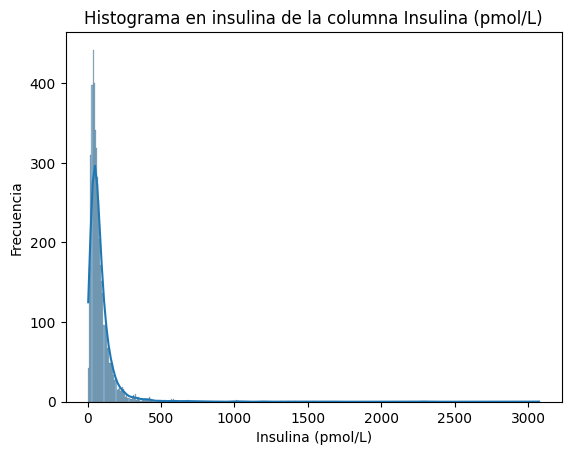

[09/10/24 12:08:36] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=703744;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=546421;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

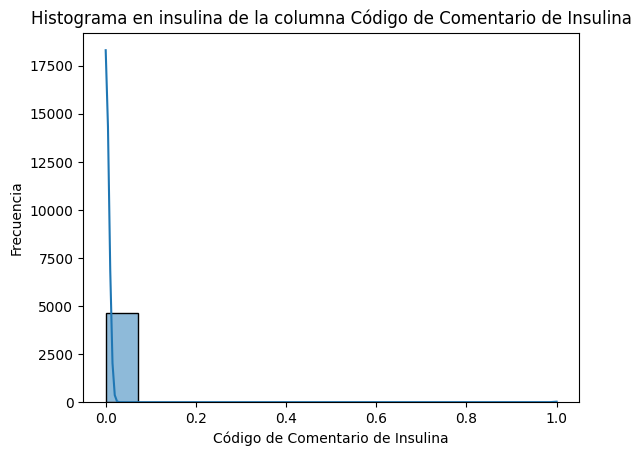

------------------------------------------------------------

----------------------- Dataframe colesterol -----------------------



                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=903830;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=640118;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

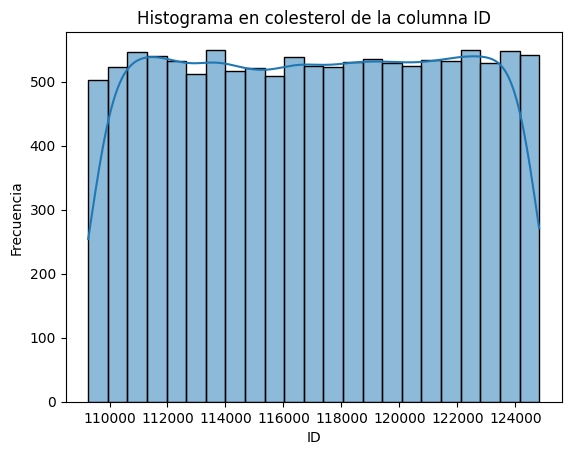

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=22653;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=487767;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

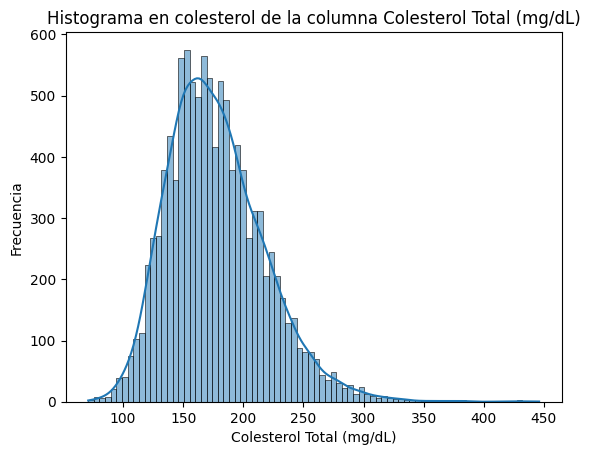

[09/10/24 12:08:37] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=482;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=425776;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

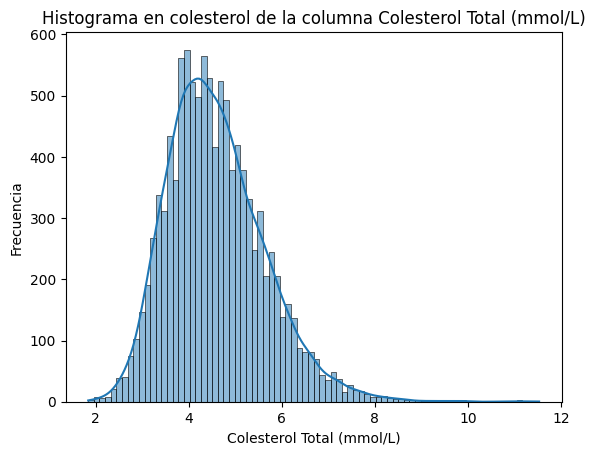

------------------------------------------------------------

----------------------- Dataframe depresion -----------------------



                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=973281;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=958523;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

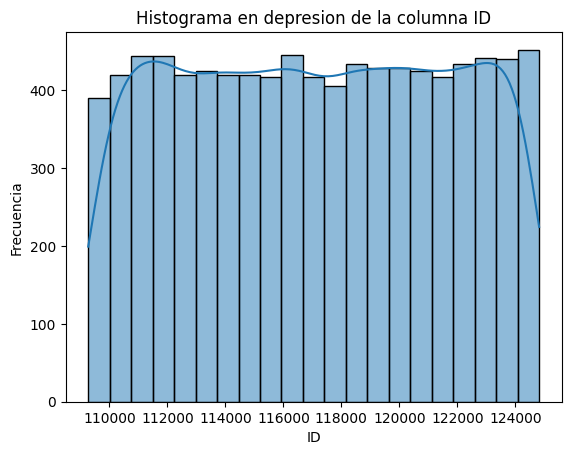

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=558708;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=573160;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

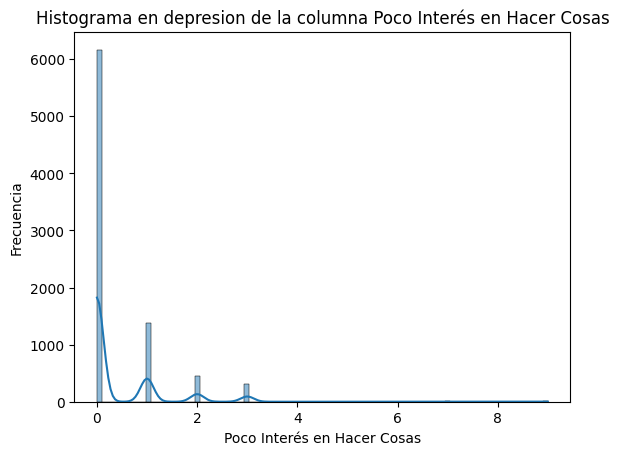

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=301015;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=878951;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

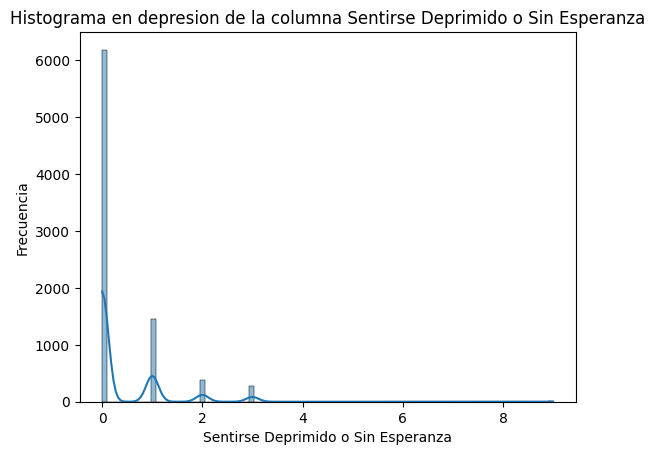

[09/10/24 12:08:38] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=950813;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=376843;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

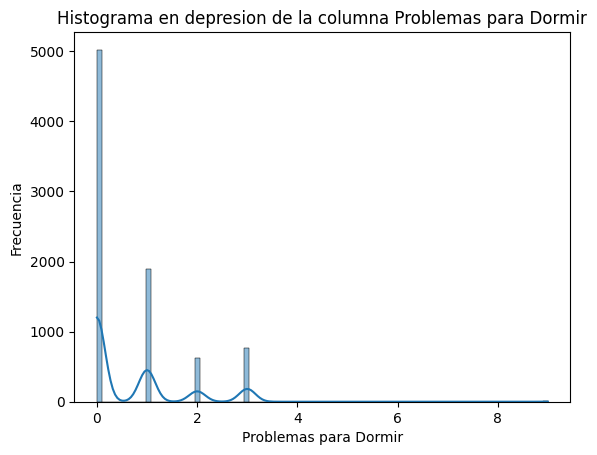

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=622943;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=870856;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

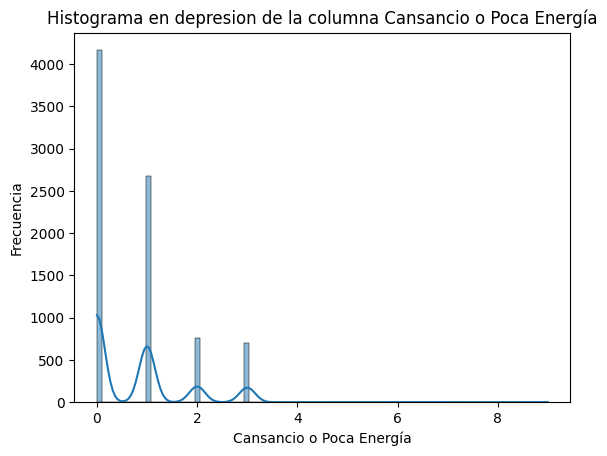

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=762832;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=814843;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

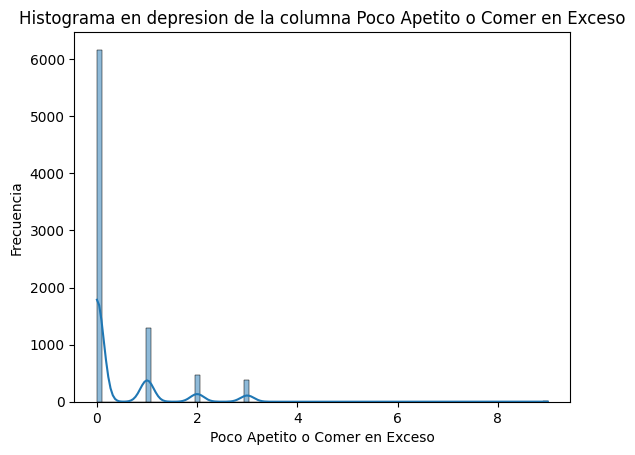

[09/10/24 12:08:39] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=609491;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=492907;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

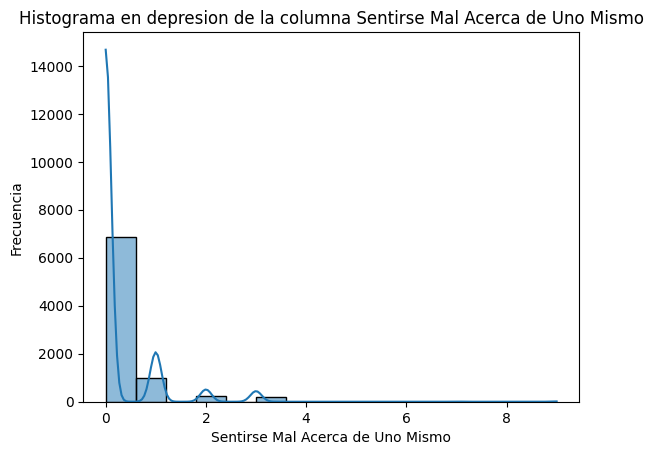

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=300288;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=85537;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

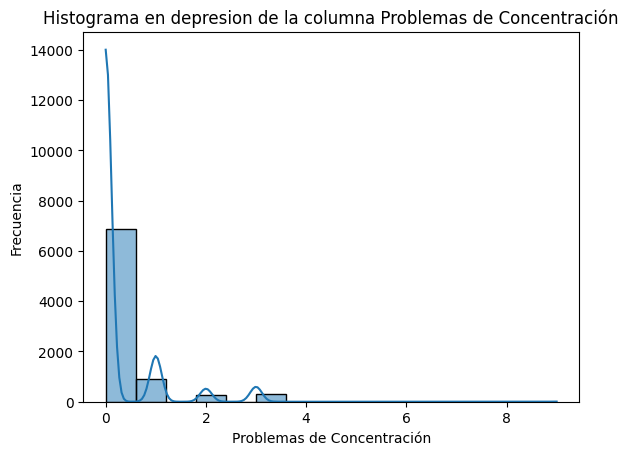

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=988731;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=964027;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

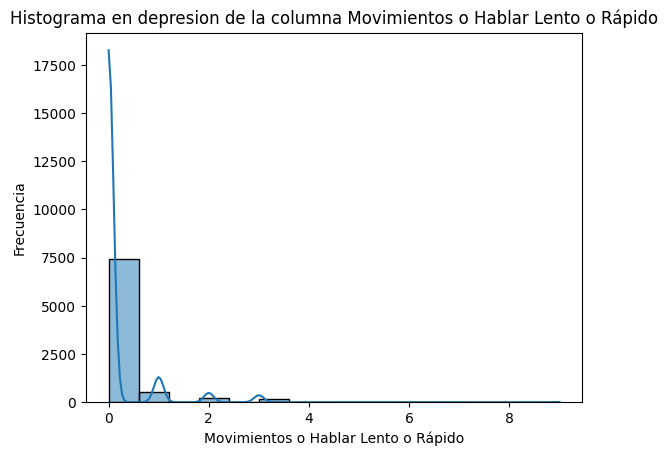

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=938742;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=160210;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

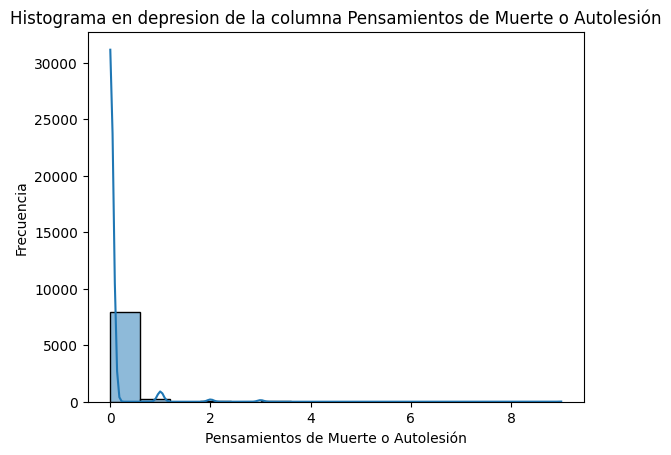

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=35770;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=789814;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

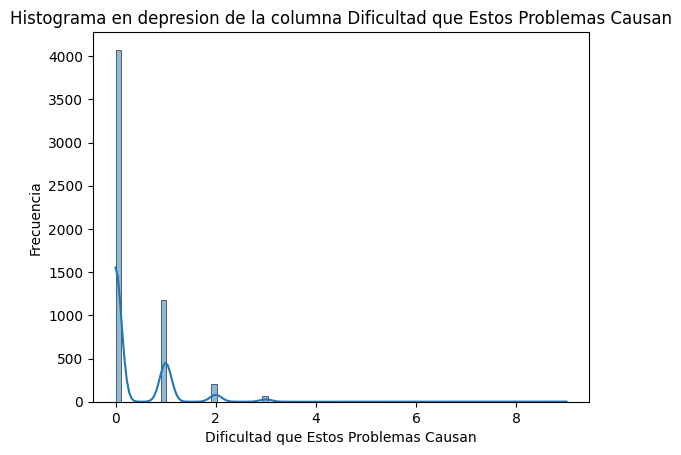

------------------------------------------------------------

----------------------- Dataframe proteinaC -----------------------



[09/10/24 12:08:40] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=230575;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=479035;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

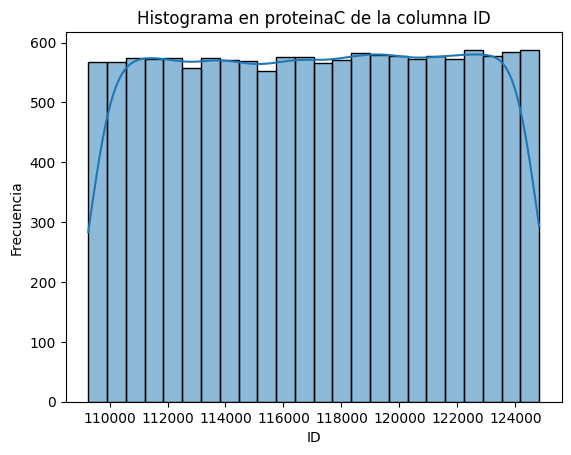

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=636044;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=655405;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

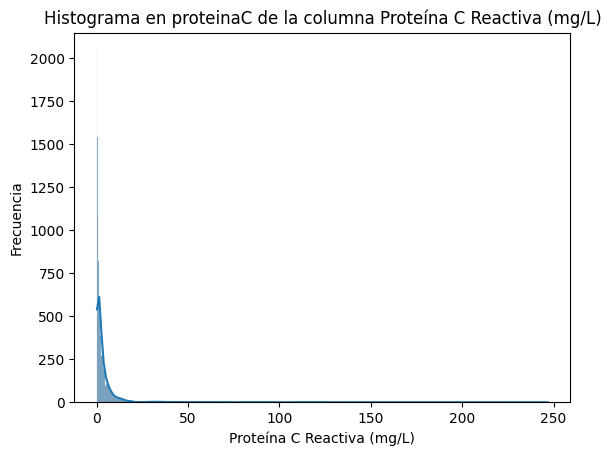

[09/10/24 12:08:42] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=925396;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=453713;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

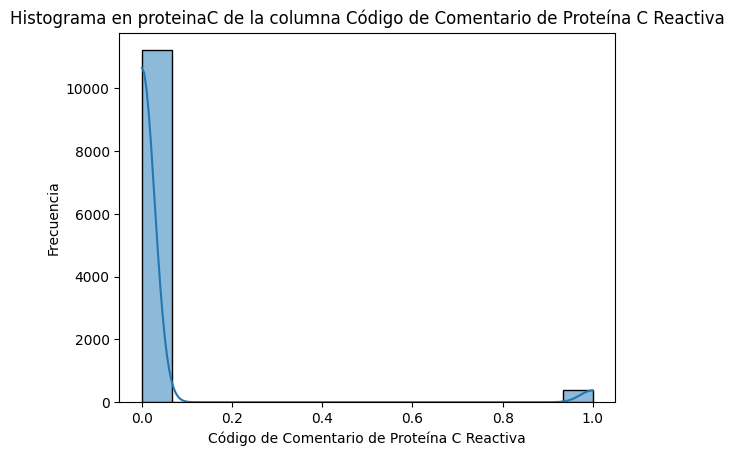

------------------------------------------------------------

----------------------- Dataframe perfilBioquimico -----------------------



                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=758918;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=439187;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

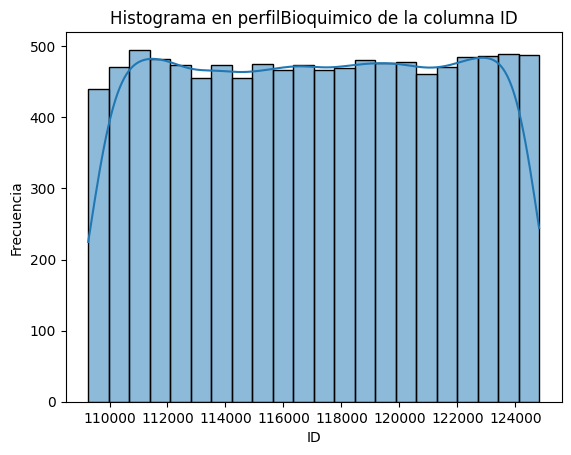

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=938682;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=512089;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

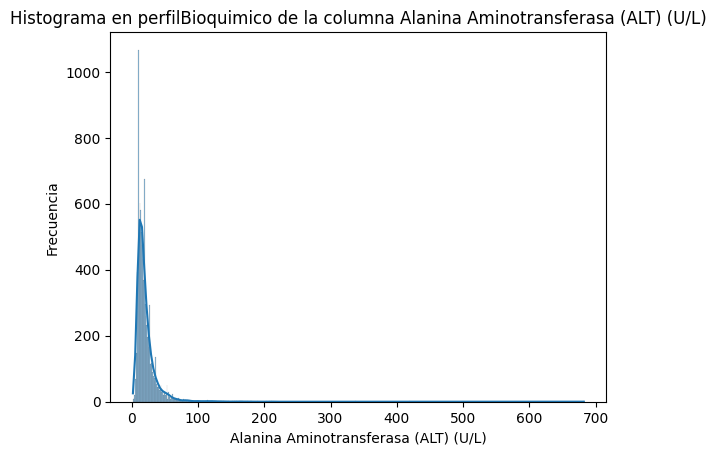

[09/10/24 12:08:43] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=51315;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=109309;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

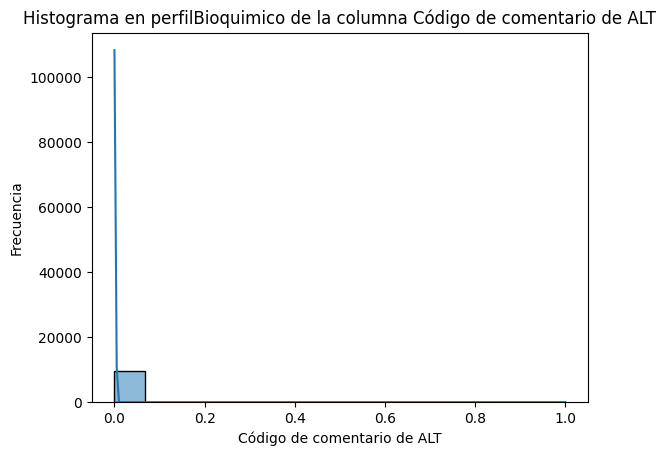

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=855923;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=405295;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

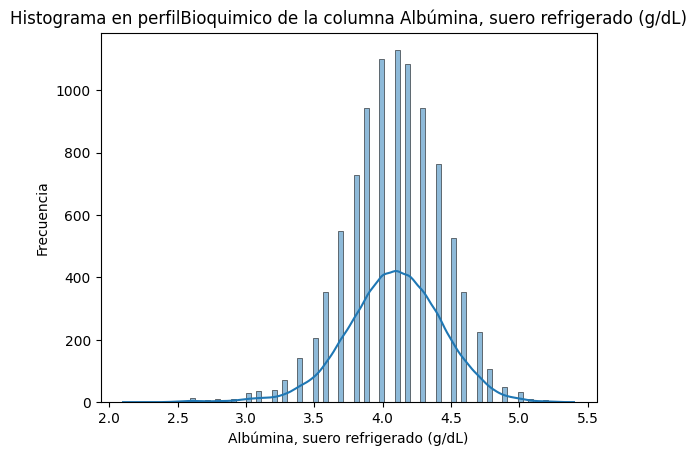

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=337995;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=114319;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

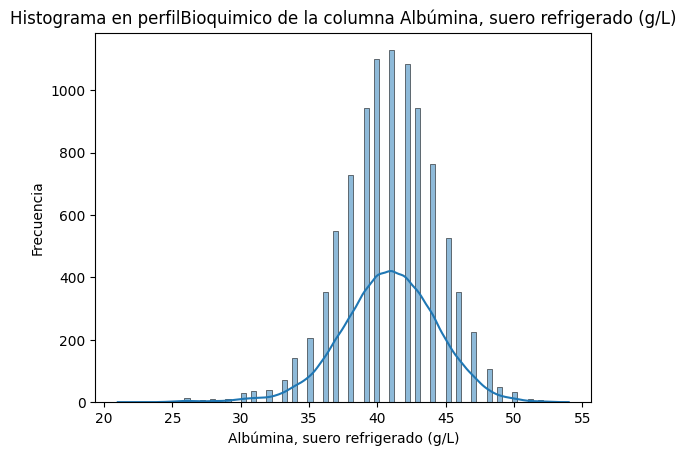

[09/10/24 12:08:44] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=470422;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=811973;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

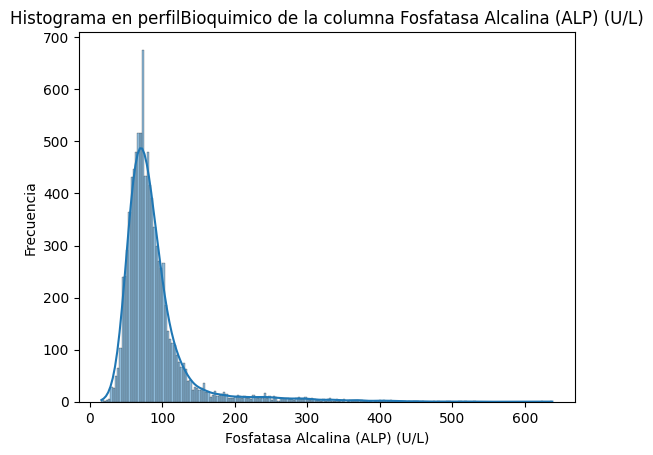

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=545446;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=346157;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

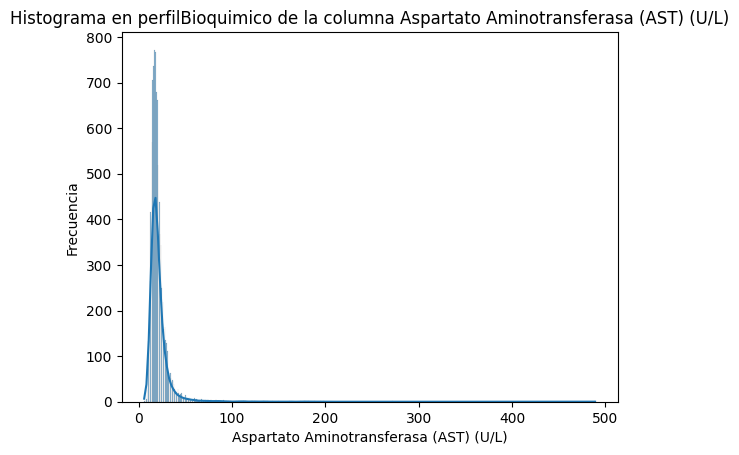

[09/10/24 12:08:45] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=809704;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=873079;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

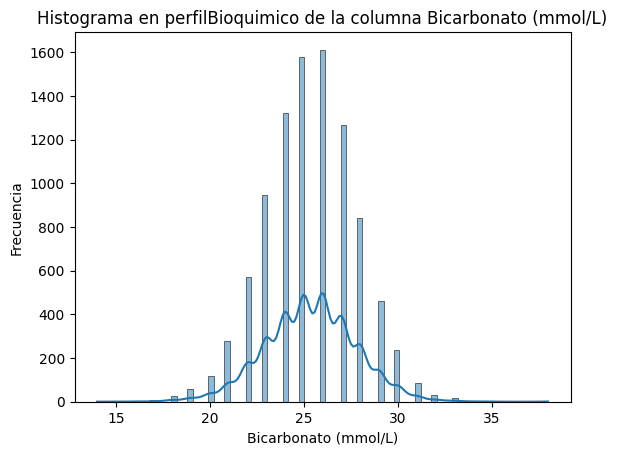

[09/10/24 12:08:46] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=39746;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=386335;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

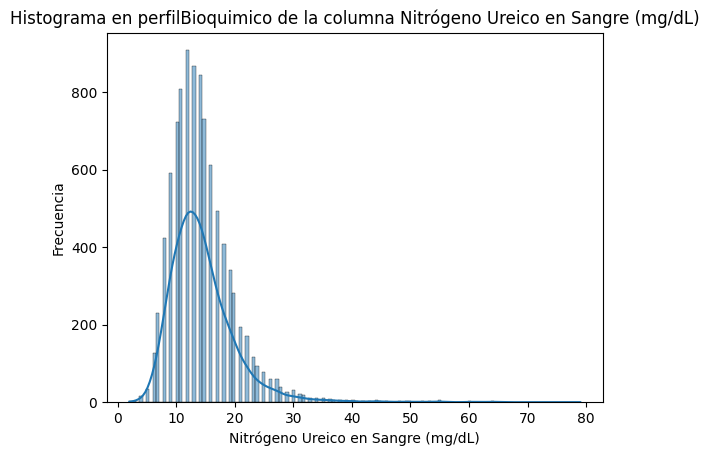

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=449313;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=188174;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

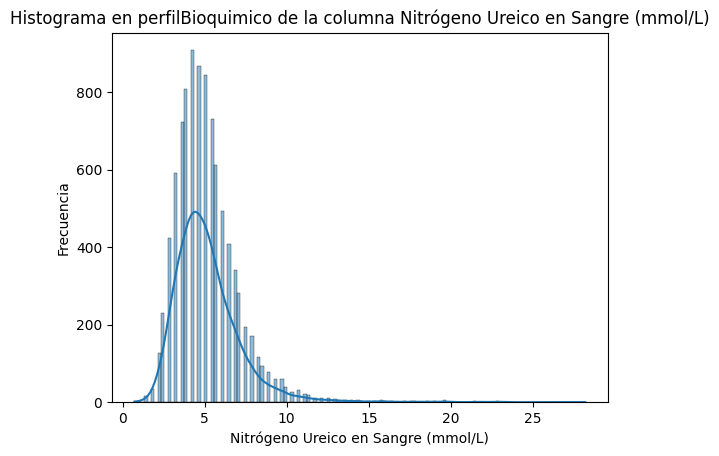

[09/10/24 12:08:47] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=234948;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=673804;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

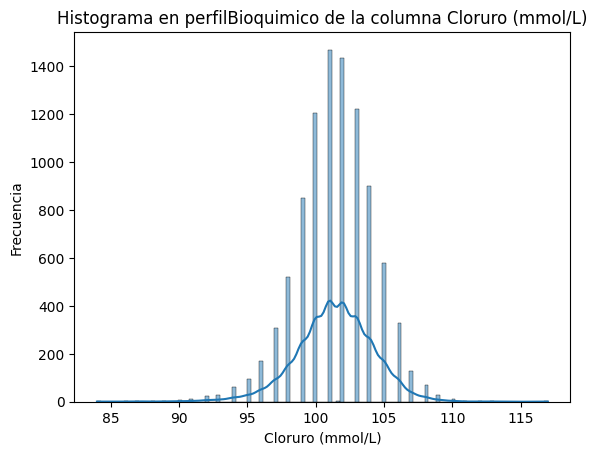

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=448259;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=25262;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

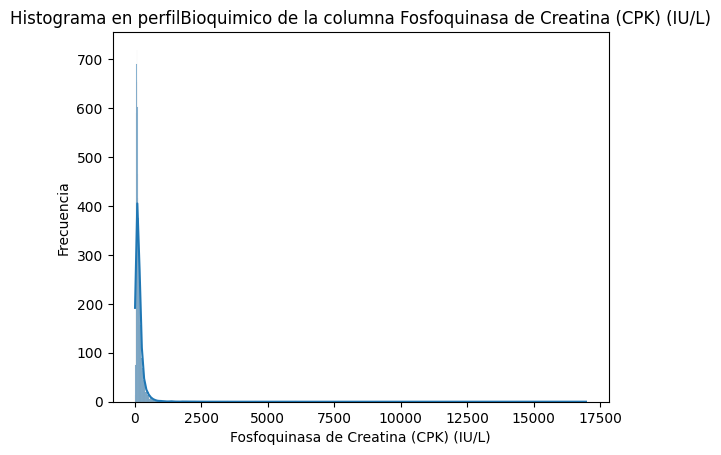

[09/10/24 12:08:49] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=844972;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=416475;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

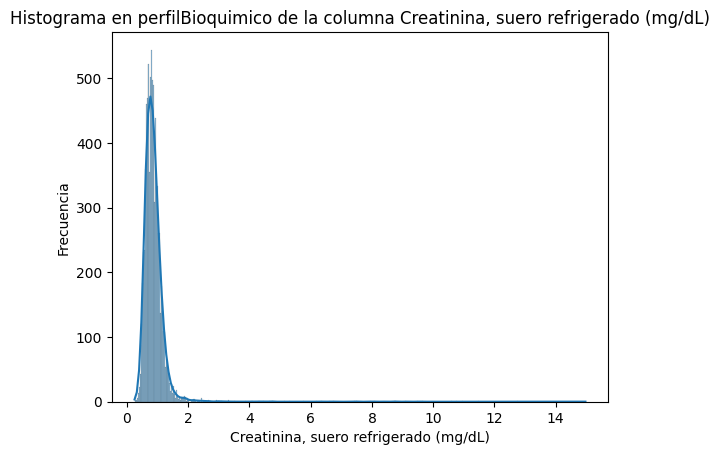

[09/10/24 12:08:50] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=755389;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=491582;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

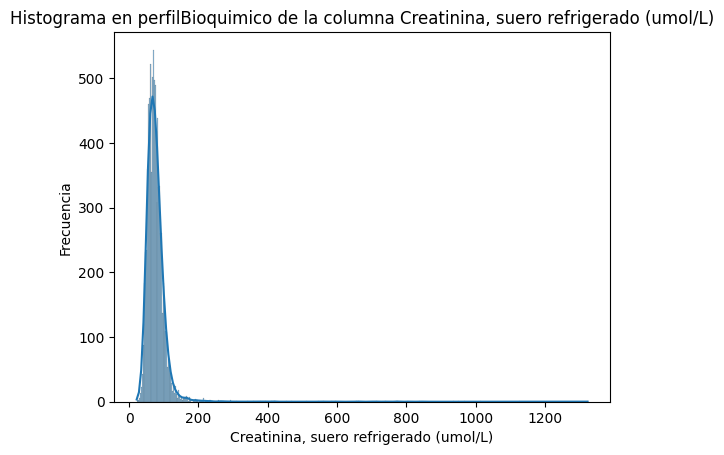

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=864306;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=627464;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

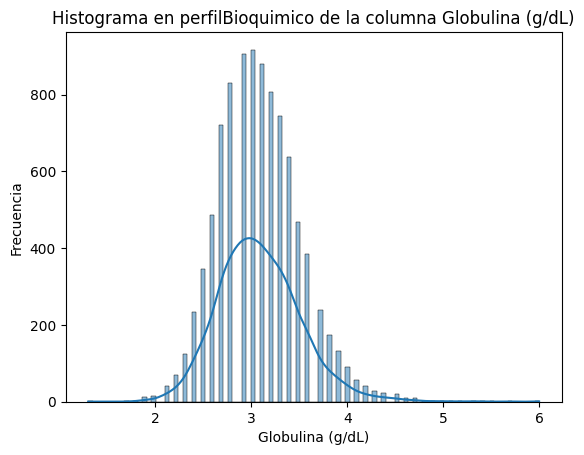

[09/10/24 12:08:51] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=537197;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=630902;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

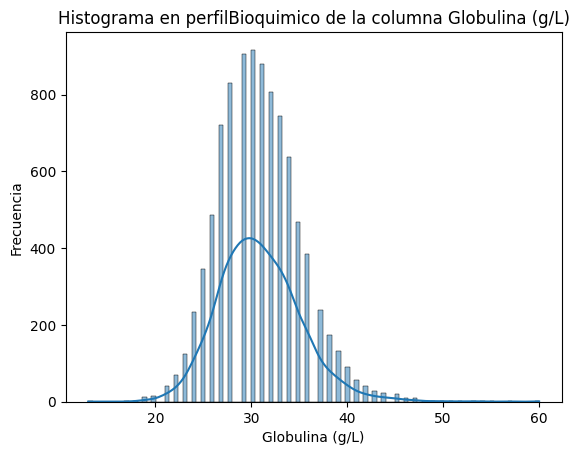

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=80295;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=574483;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

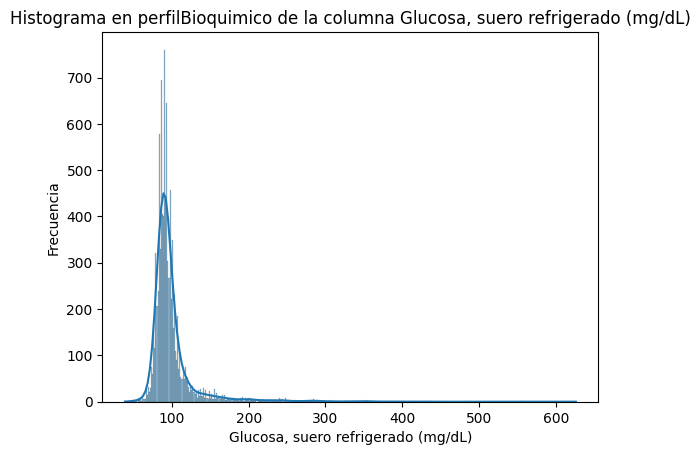

[09/10/24 12:08:52] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=952967;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=697235;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

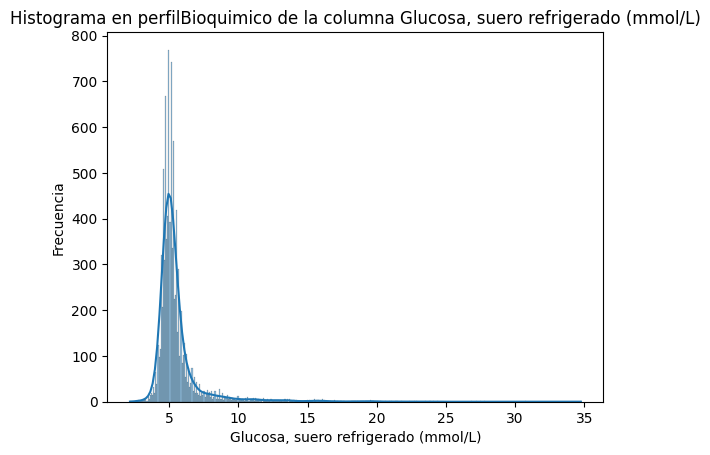

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=485457;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=598383;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

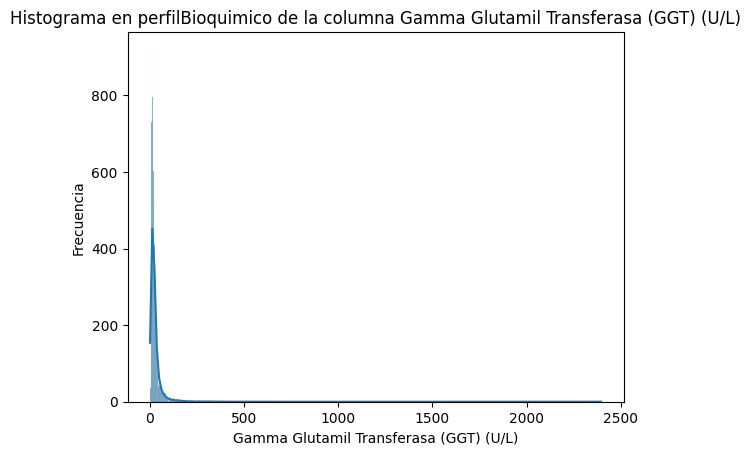

[09/10/24 12:08:54] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=438850;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=115963;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

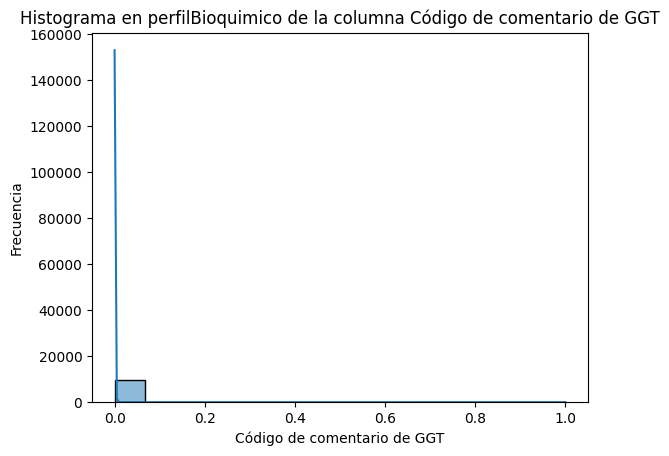

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=914344;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=323949;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

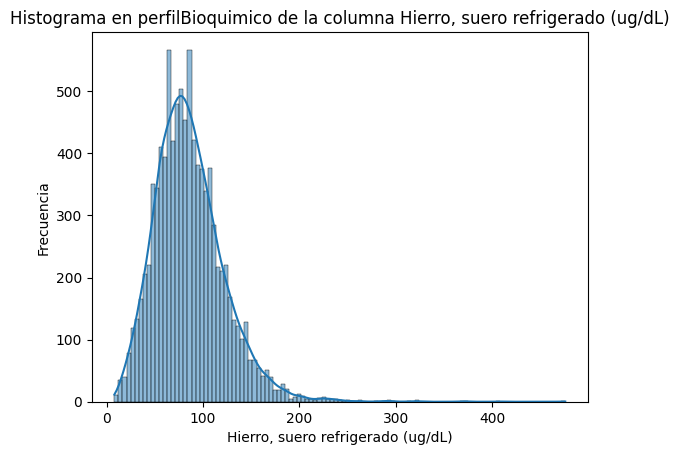

[09/10/24 12:08:55] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=549781;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=527657;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

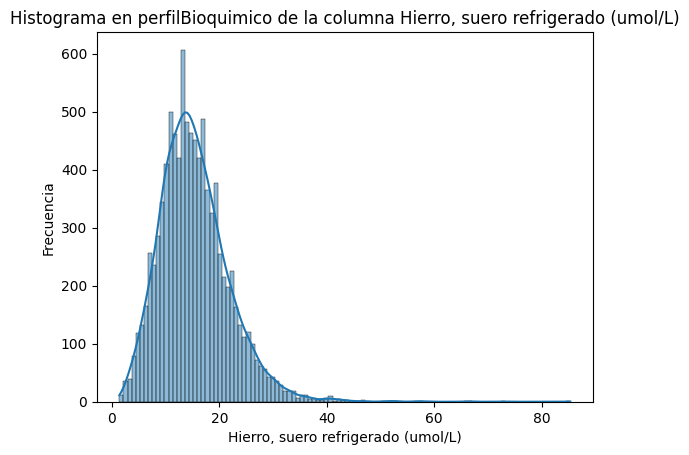

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=113527;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=20455;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

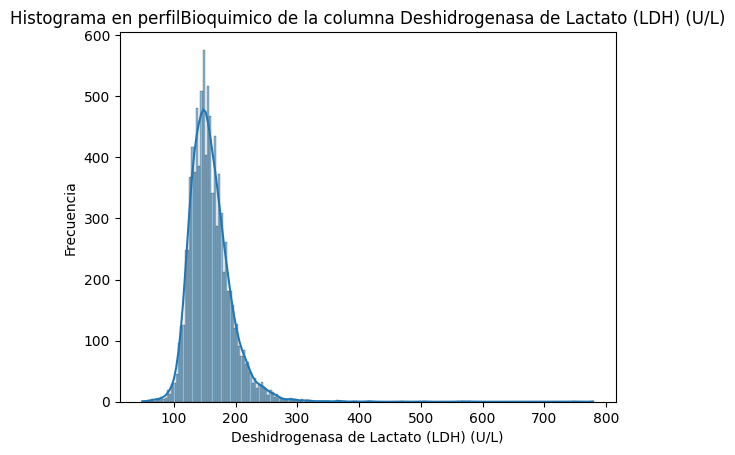

[09/10/24 12:08:56] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=87751;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=888572;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

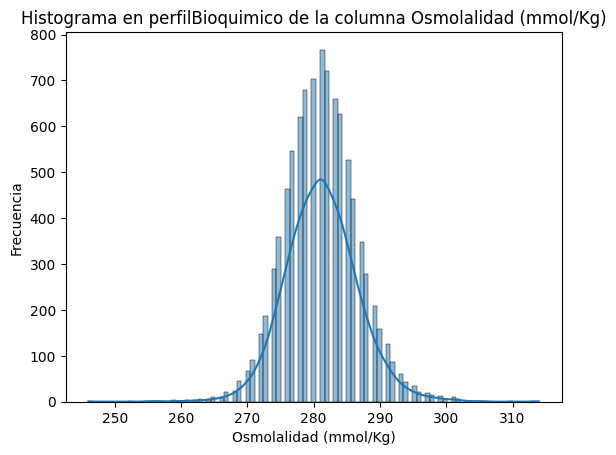

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=955693;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=48916;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

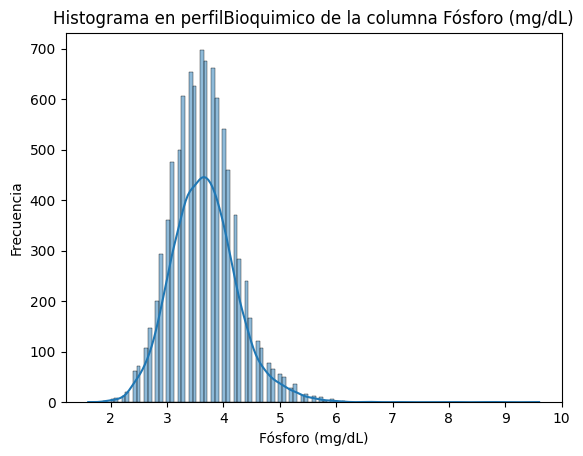

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=84350;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=639512;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

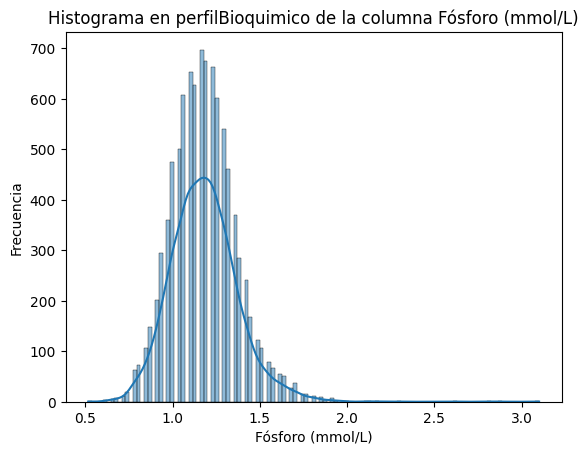

[09/10/24 12:08:57] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=587954;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=38806;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

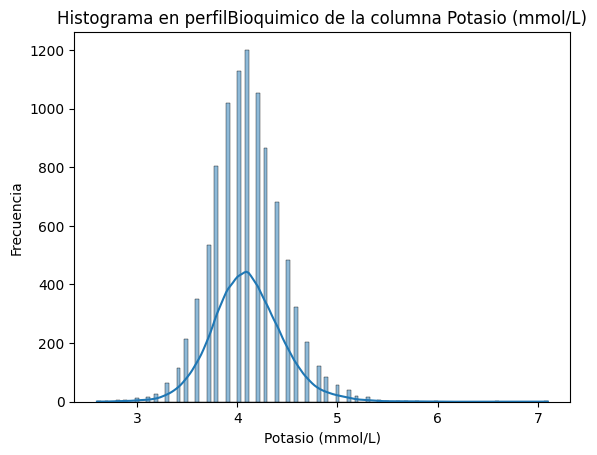

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=73179;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=922748;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

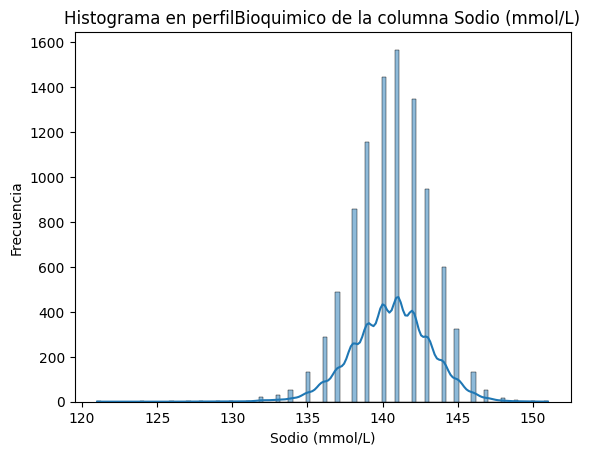

[09/10/24 12:08:58] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=298553;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=353534;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

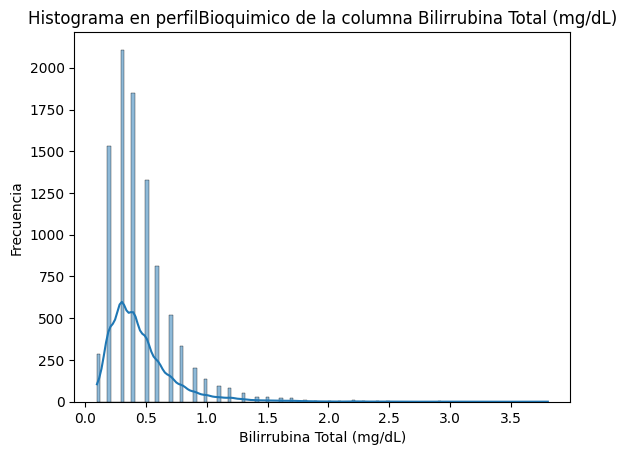

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=88867;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=903599;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

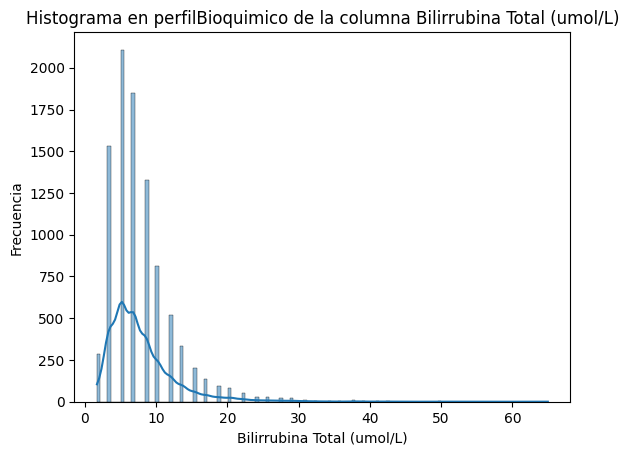

[09/10/24 12:08:59] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=729741;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=482119;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

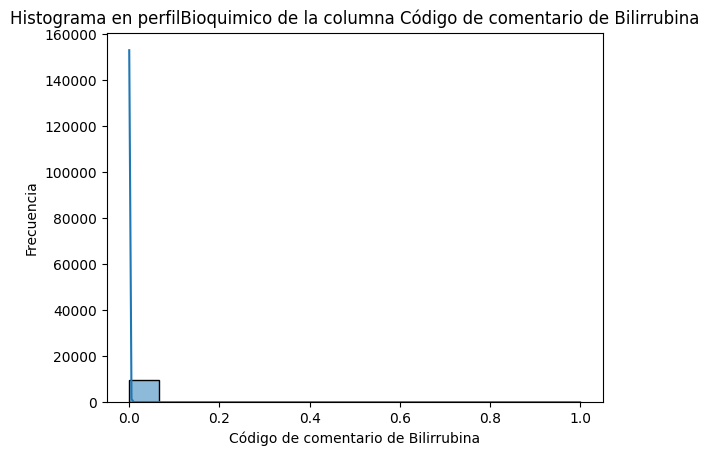

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=479969;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=131174;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

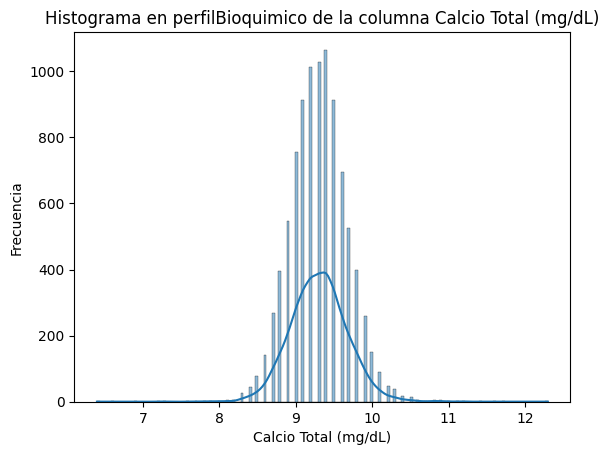

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=590805;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=230831;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

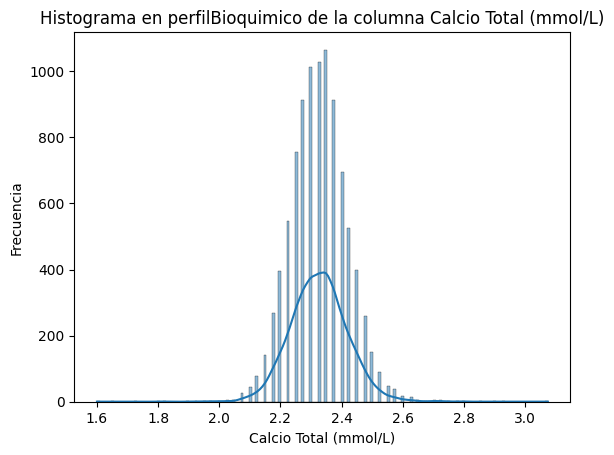

[09/10/24 12:09:00] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=880283;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=367502;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

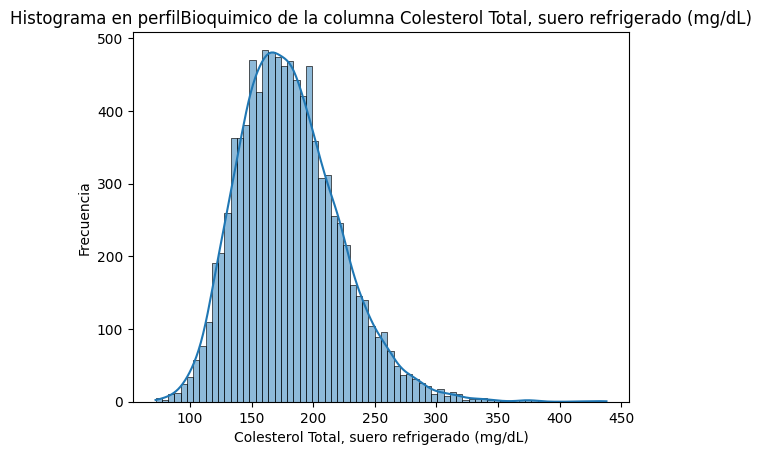

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=22384;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=108204;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

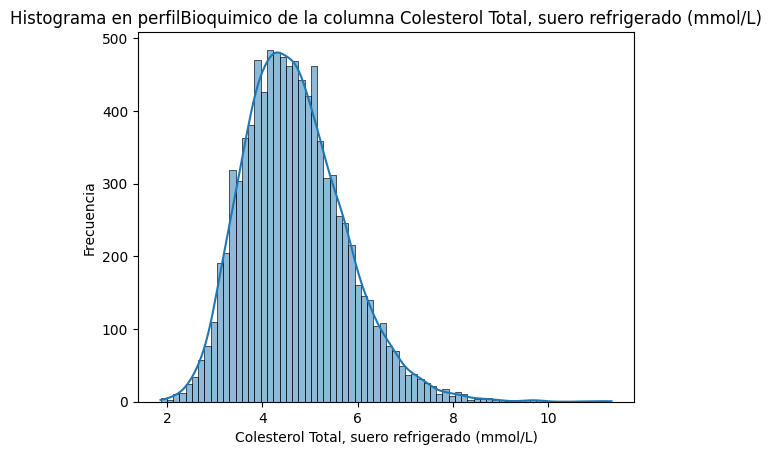

[09/10/24 12:09:01] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=429529;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=140834;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

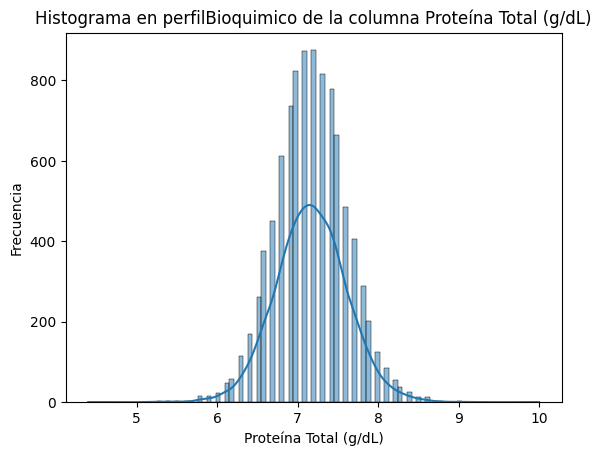

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=510675;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=794355;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

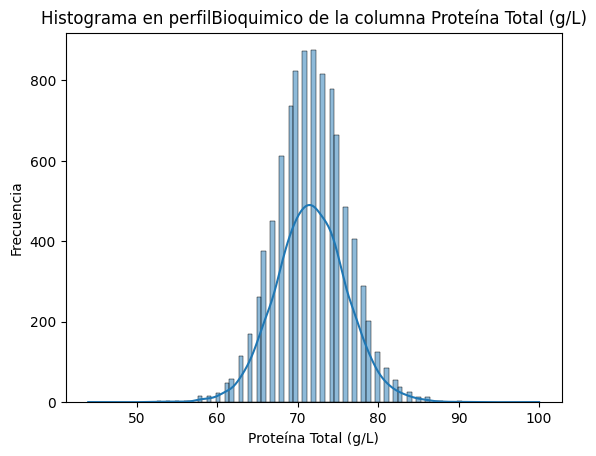

[09/10/24 12:09:02] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=954006;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=991556;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

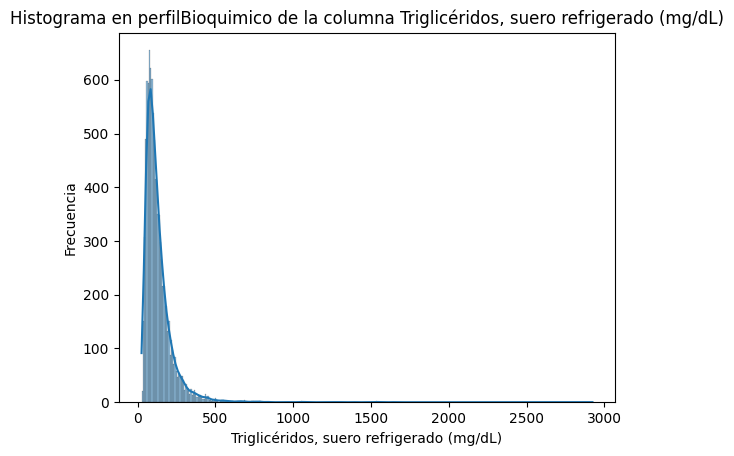

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=982998;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=528474;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

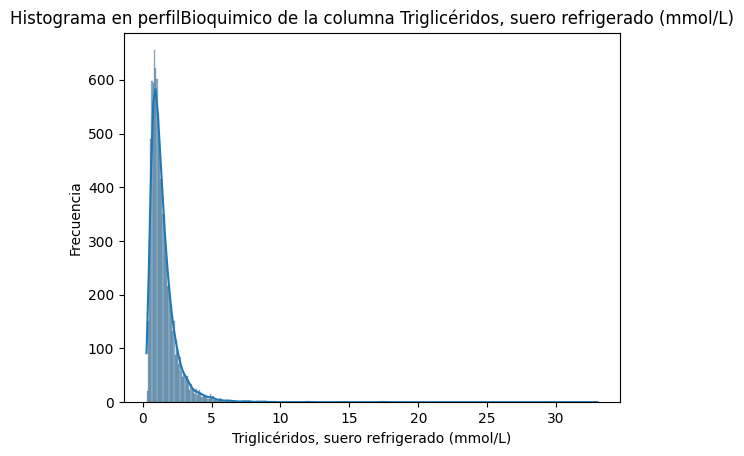

[09/10/24 12:09:03] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=25459;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=983466;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

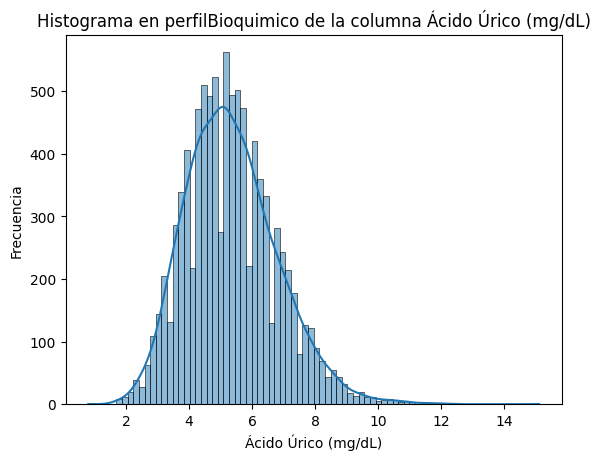

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=726247;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=711224;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

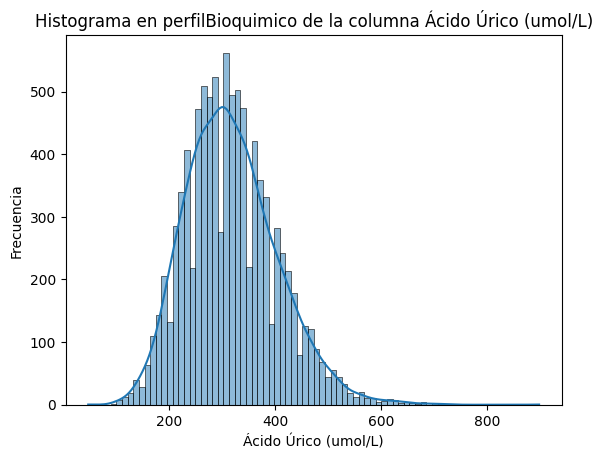

------------------------------------------------------------

----------------------- Dataframe presionArterial -----------------------



                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=26483;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=763516;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

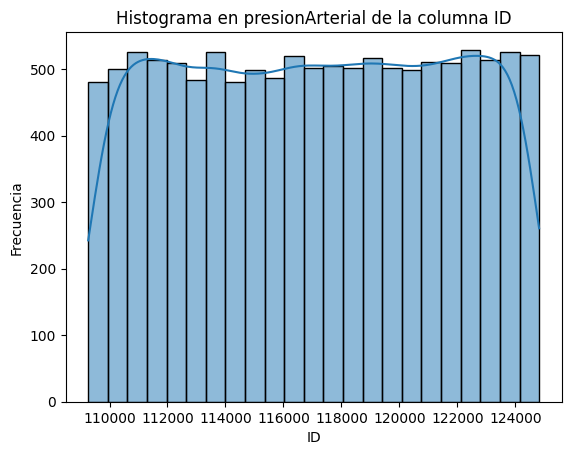

[09/10/24 12:09:04] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=767148;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=246873;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

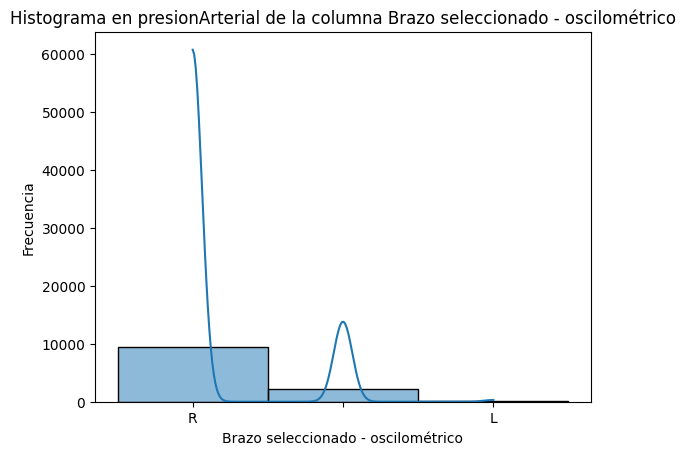

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=166611;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=401424;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

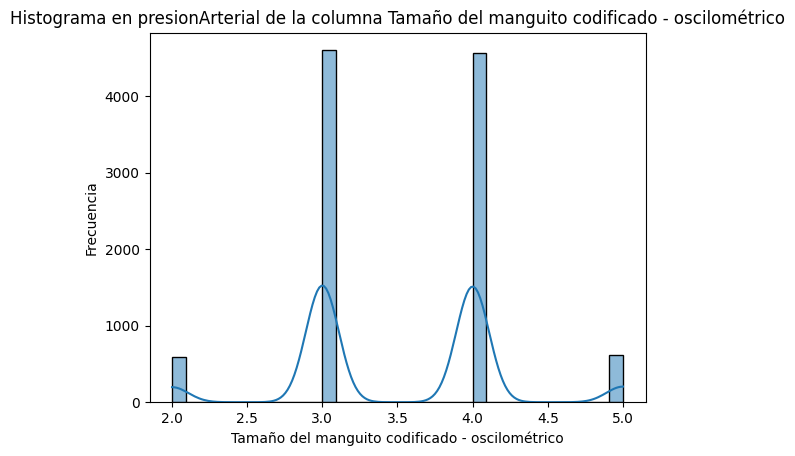

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=76116;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=416454;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

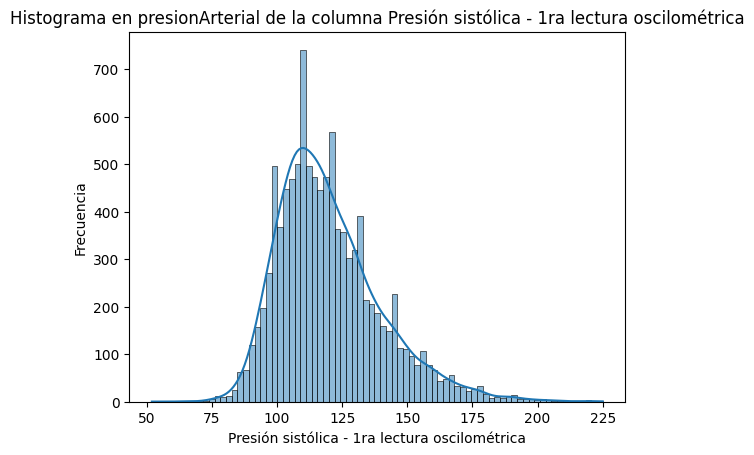

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=970780;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=286779;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

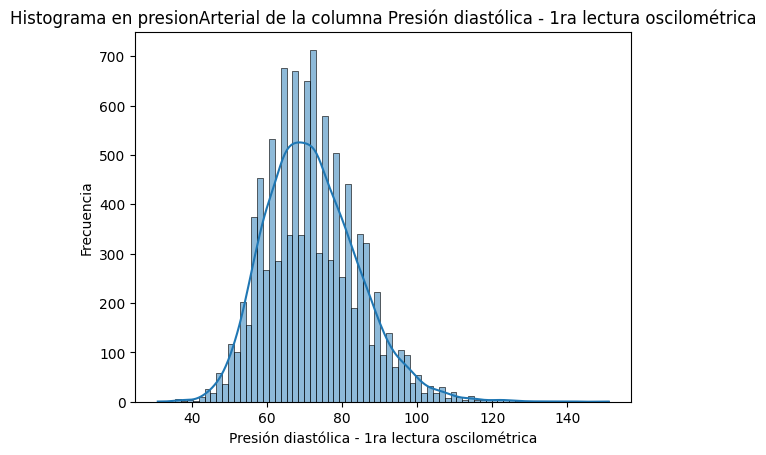

[09/10/24 12:09:05] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=97305;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=282014;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

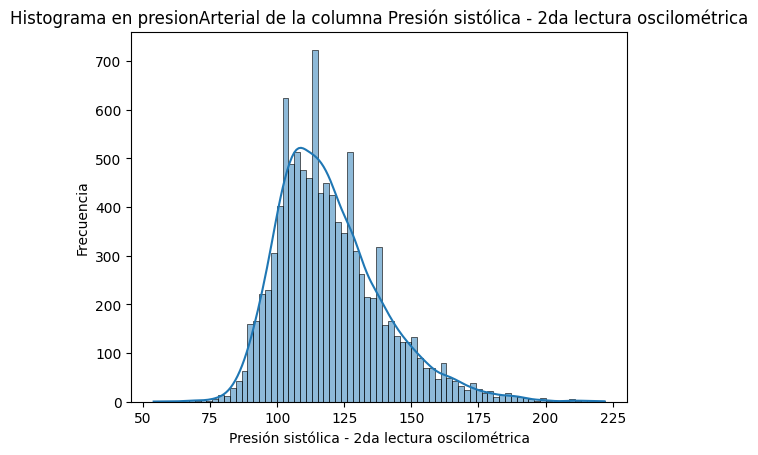

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=5167;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=767135;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

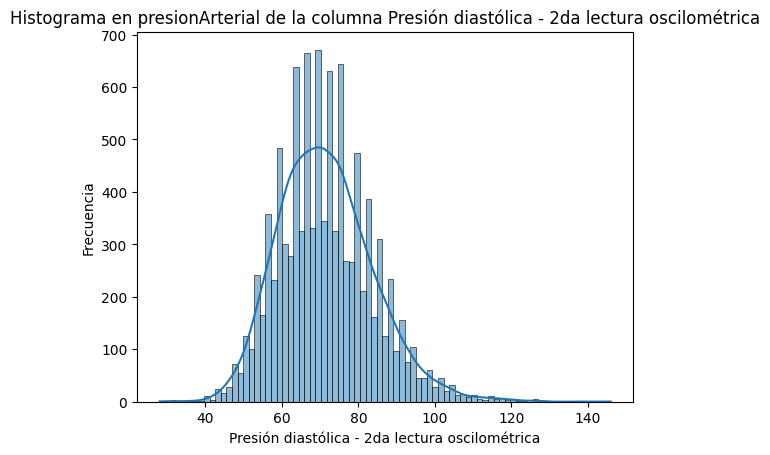

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=820017;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=710787;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

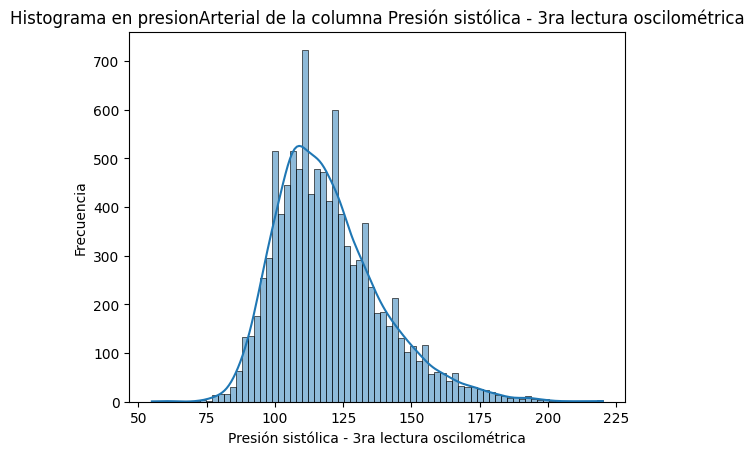

[09/10/24 12:09:06] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=252515;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=18566;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

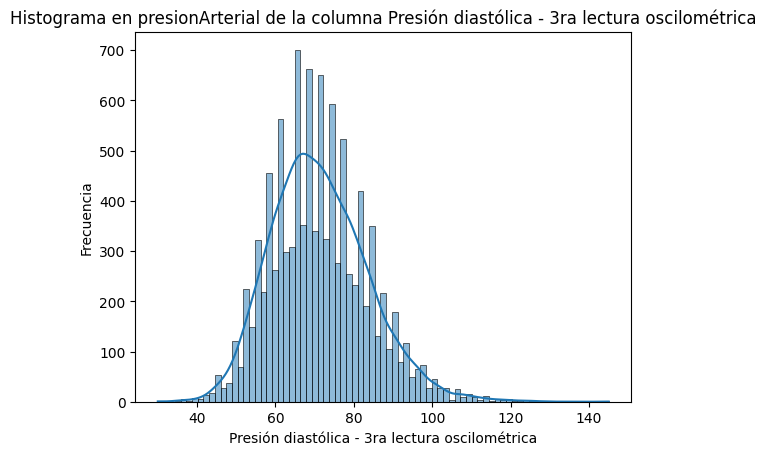

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=943323;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=418206;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

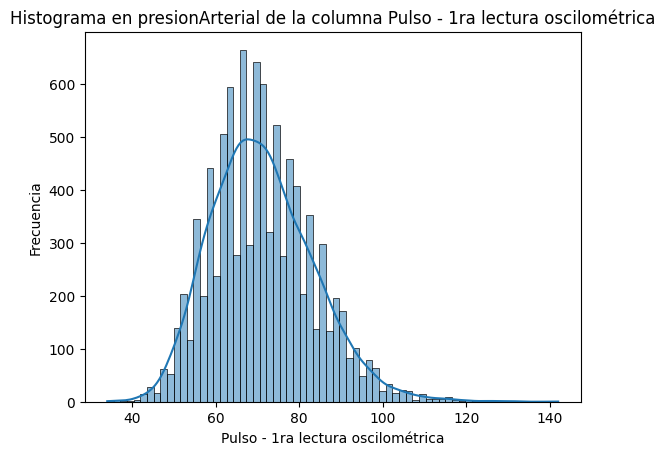

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=248068;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=342579;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

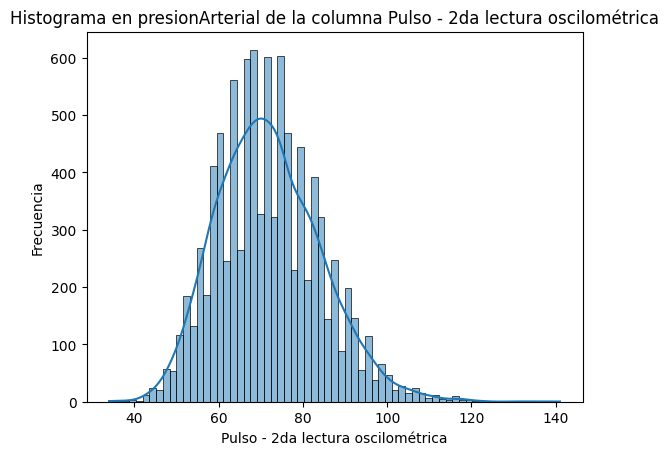

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=848479;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=534781;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

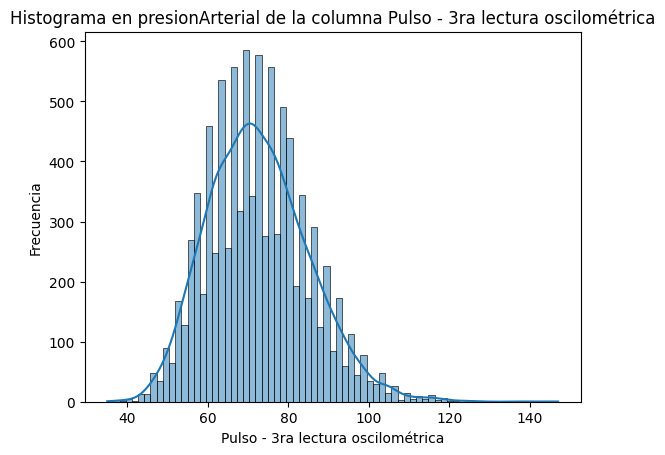

------------------------------------------------------------

----------------------- Dataframe medidasCorporales -----------------------



[09/10/24 12:09:07] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=257919;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=881138;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

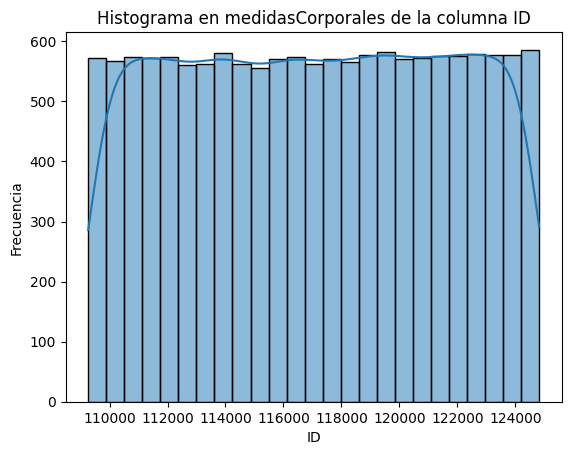

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=789384;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=568734;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

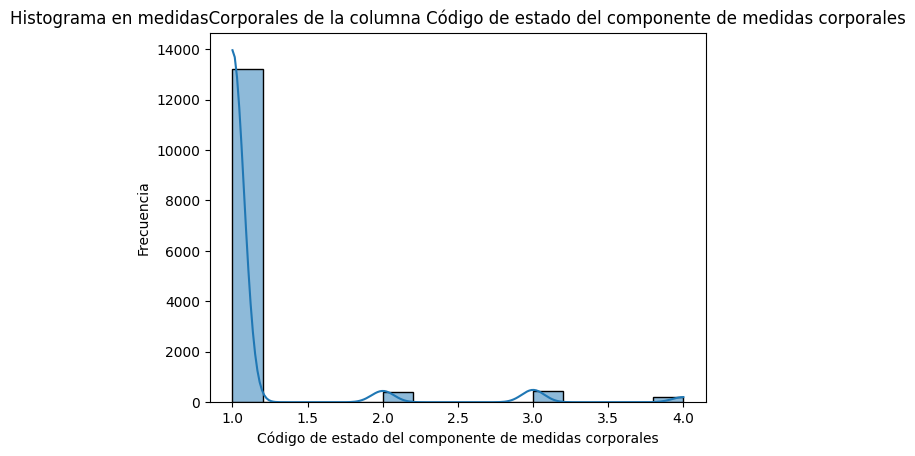

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=839843;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=574889;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

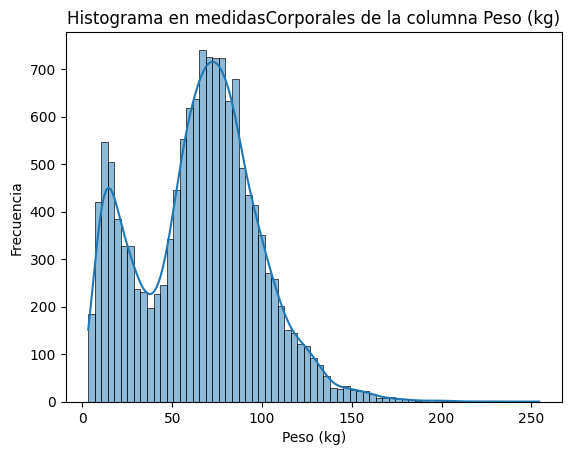

[09/10/24 12:09:08] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=814458;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=632206;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

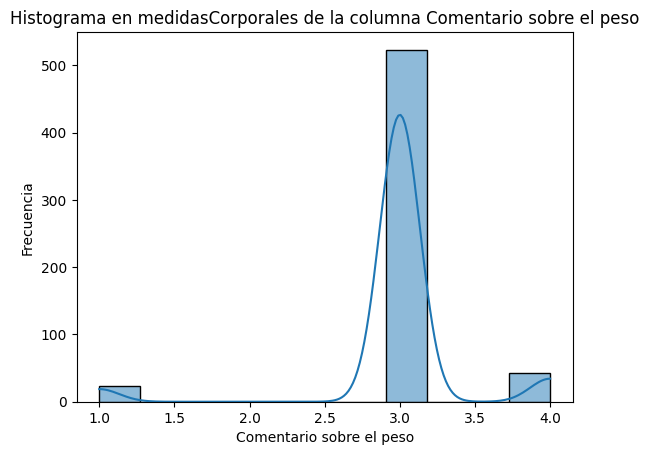

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=41354;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=268522;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

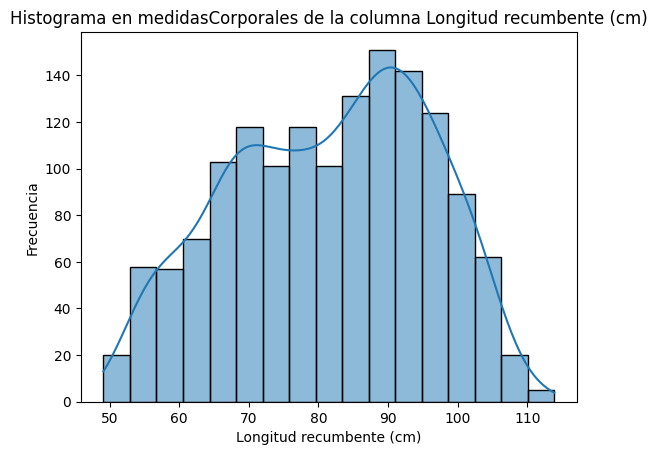

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=69328;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=359242;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

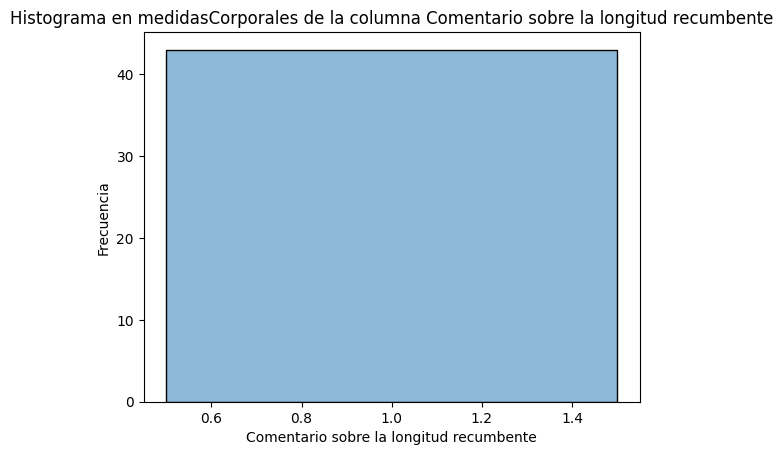

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=659649;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=296033;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

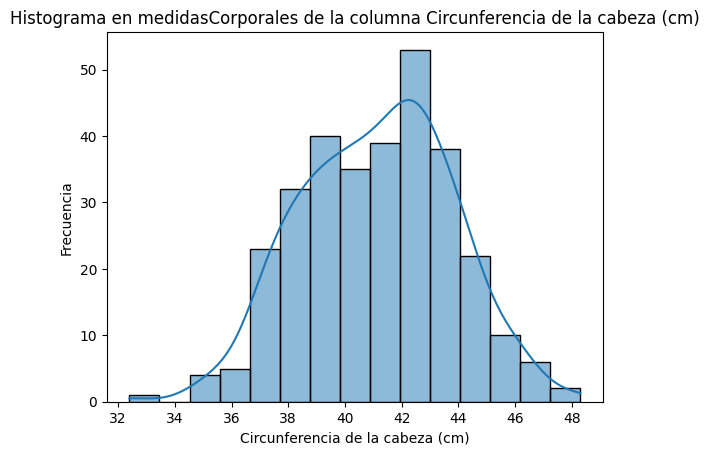

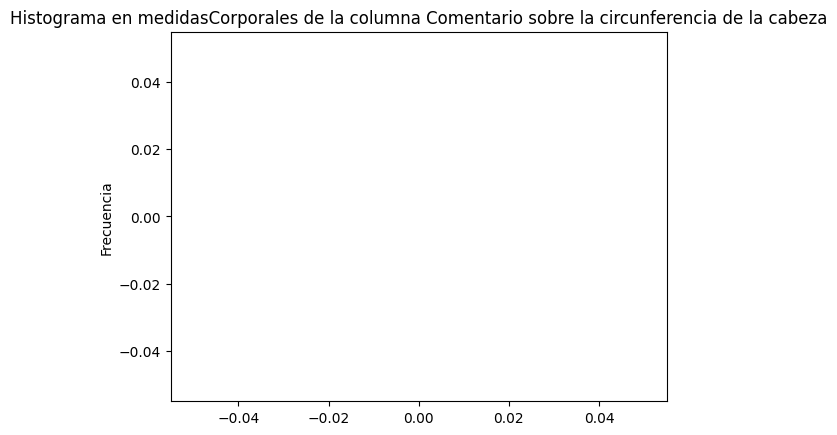

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=193987;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=655118;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

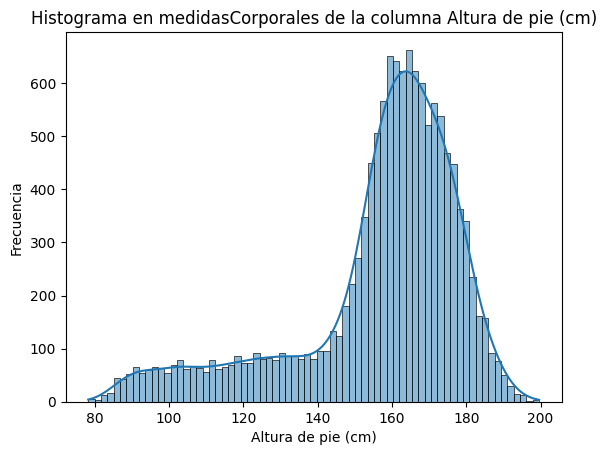

[09/10/24 12:09:09] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=822748;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=947895;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

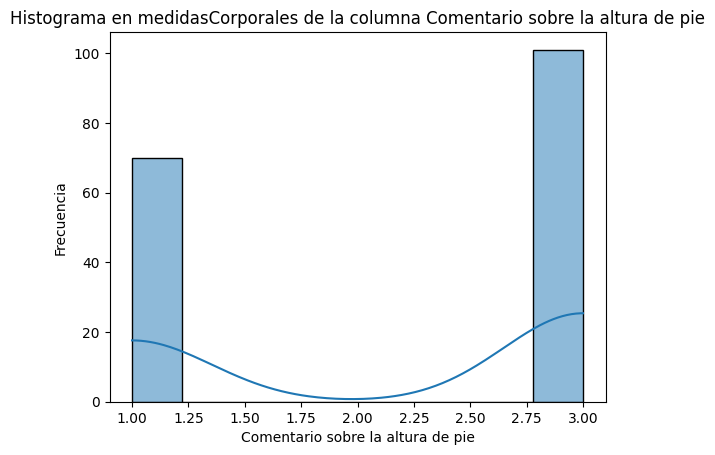

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=937705;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=37319;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

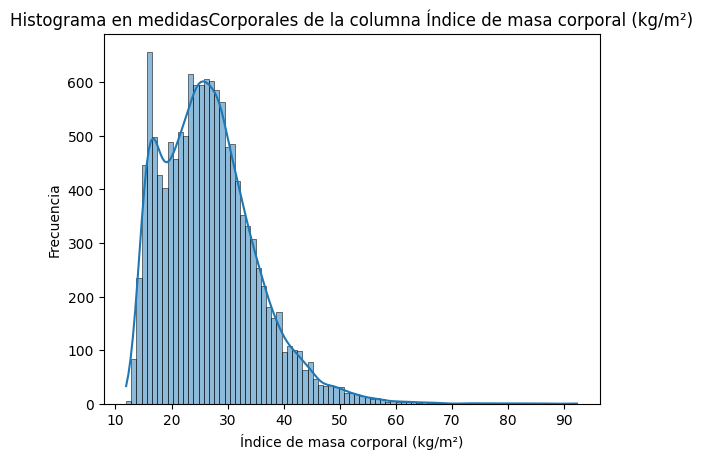

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=321653;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=221501;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

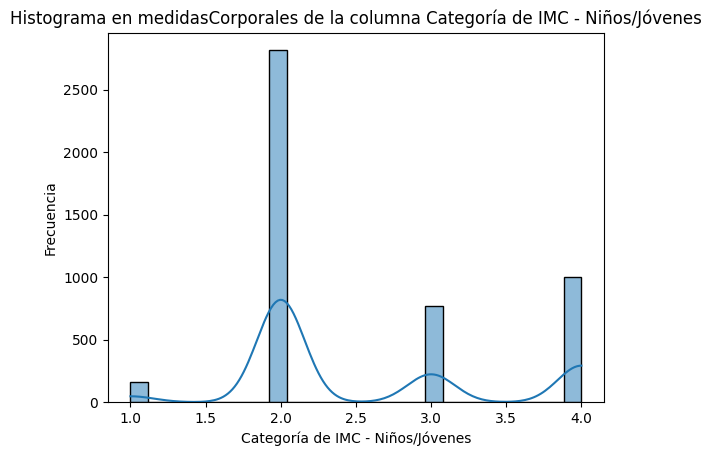

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=877471;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=101626;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

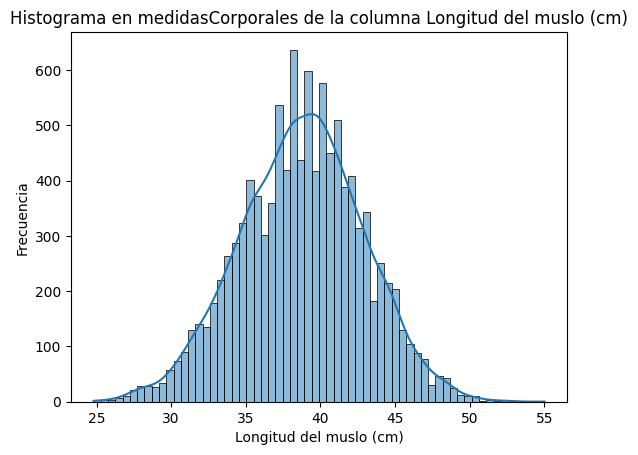

[09/10/24 12:09:10] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=453723;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=470567;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

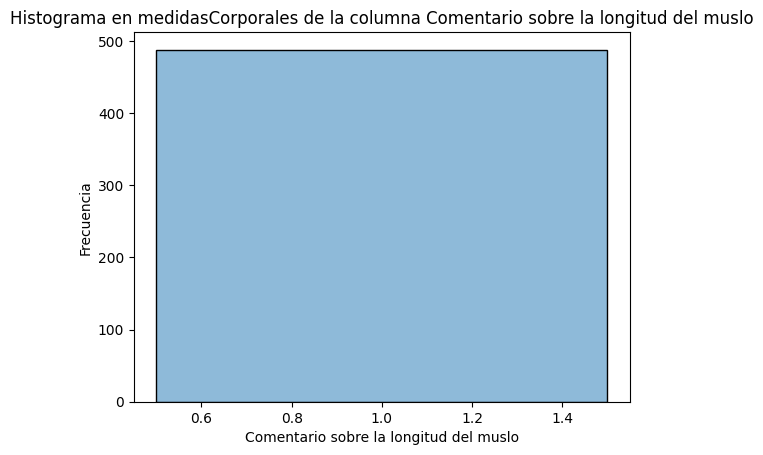

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=174091;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=163478;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

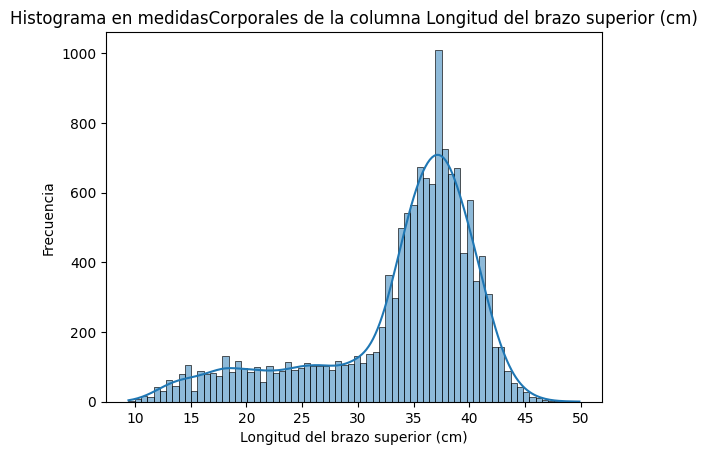

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=894330;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=616077;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

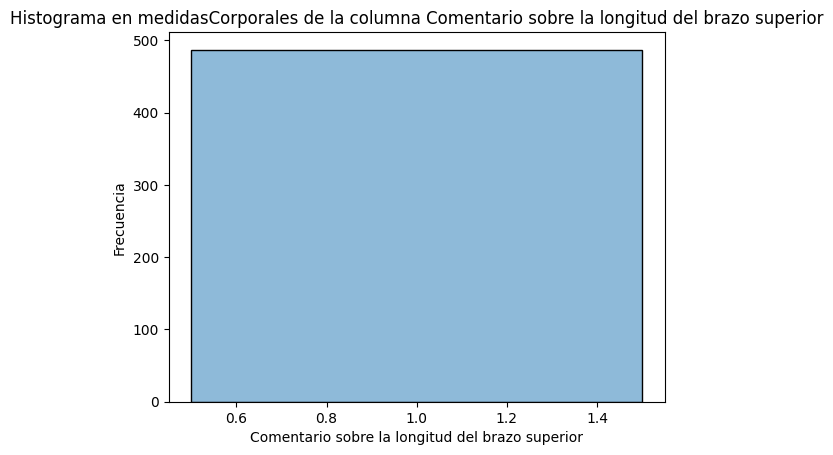

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=732903;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=33312;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

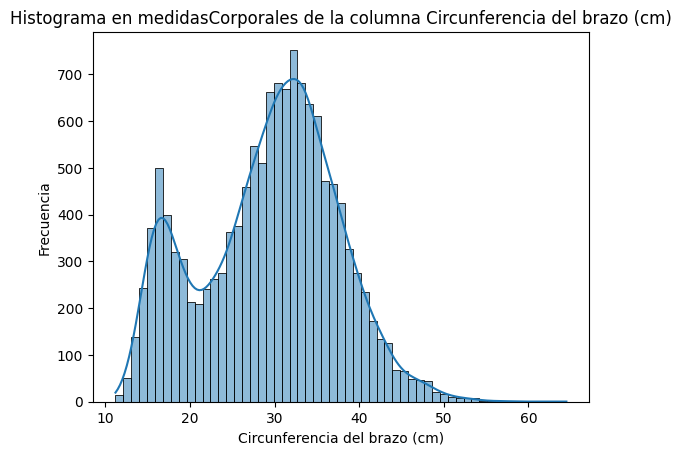

[09/10/24 12:09:11] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=114832;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=667515;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

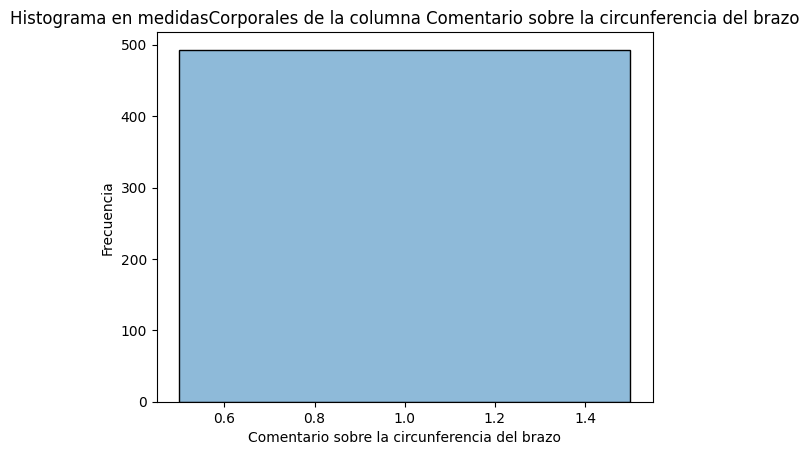

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=938314;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=483752;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

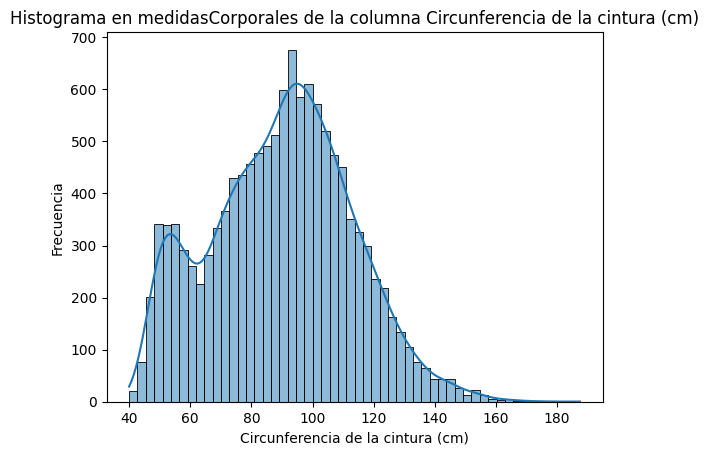

[09/10/24 12:09:12] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=630326;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=616143;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

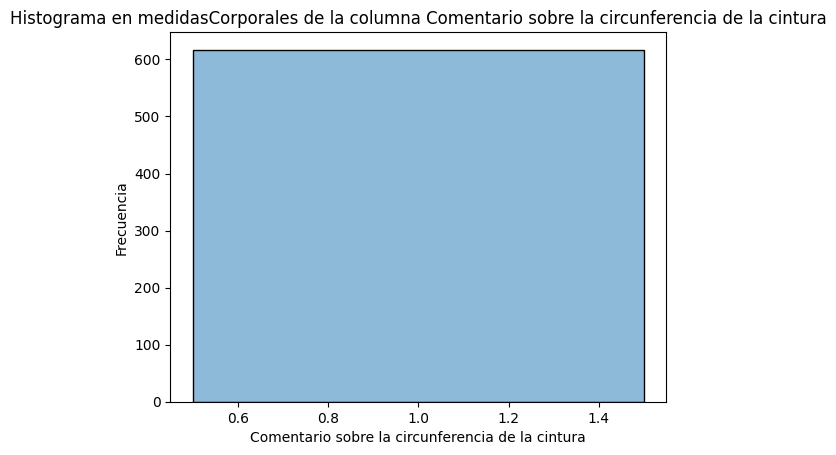

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=897953;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=84022;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

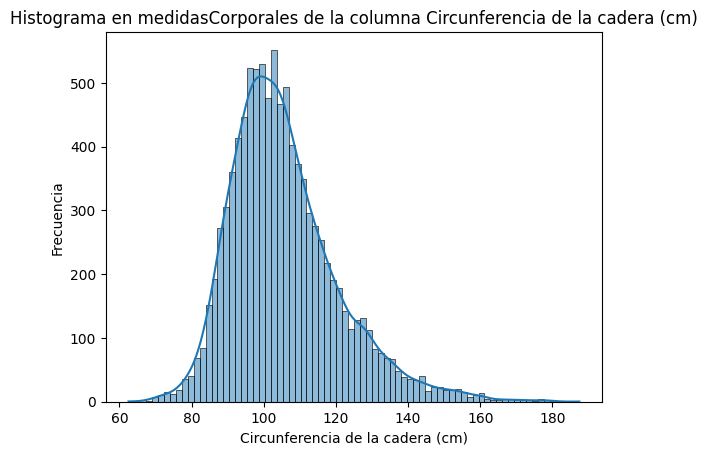

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=680375;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=205535;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

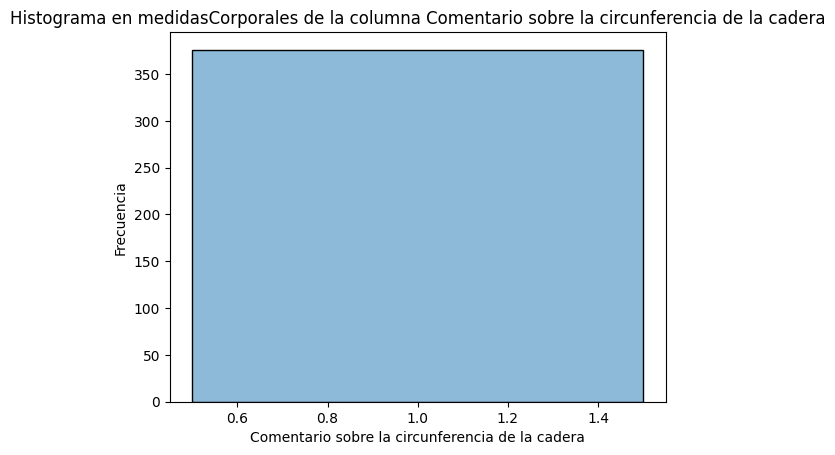

------------------------------------------------------------



In [6]:
for df in dataframes:
    print(f"----------------------- Dataframe {df} -----------------------\n")
    for dato in dataframes[df].columns:
        sns.histplot(data=dataframes[df], x=dato, kde=True)
        plt.title(f'Histograma en {df} de la columna {dato}')
        plt.ylabel('Frecuencia')
        plt.show()
    print(f"------------------------------------------------------------\n")

A modo de resumen, las interpretaciones mas notables son

*Distribuciones de Demografía*

Edad: Distribución sesgada hacia la derecha, con un pico alrededor de los 55-65 años. Esto indica que la mayor parte de la población en el estudio es de mediana a avanzada edad.

Género: Distribución binaria con dos picos idénticos en las categorías "Hombre" y "Mujer", lo que indica una representación equitativa entre ambos géneros.

Raza/Etnia: Distribución con varios picos, predominando una etnia particular, lo que indica que la muestra tiene una mayor representación de un grupo étnico en comparación con los demás.

Nivel educativo: Distribución bimodal, con picos en los valores que representan “Educación secundaria” y “Educación superior”, lo que sugiere que la mayoría de los individuos tienen al menos un nivel básico de educación.

*Distribuciones de Insulina*

Insulina en ayunas (pmol/L): Distribución sesgada a la derecha, con un pico alrededor de 40-60 pmol/L. Esto sugiere que la mayoría de los participantes tienen niveles normales de insulina en ayunas.

Insulina después de 2 horas (pmol/L): Distribución también sesgada a la derecha, con valores más dispersos y un pico entre 120-160 pmol/L, lo que refleja la respuesta del cuerpo a la glucosa después de comer.

*Distribuciones de Colesterol*

Colesterol total (mmol/L): Distribución con un pico claro alrededor de los 4-5 mmol/L, lo que sugiere que la mayoría de los participantes tienen niveles normales de colesterol total.

Colesterol LDL (mmol/L): Distribución sesgada a la derecha con un pico alrededor de los 3 mmol/L, indicando niveles comunes de LDL (colesterol "malo").

Colesterol HDL (mmol/L): Distribución con un pico alrededor de 1-1.5 mmol/L, lo que sugiere niveles comunes de HDL (colesterol "bueno").

Triglicéridos (mmol/L): Distribución sesgada a la derecha, con un pico entre 1-1.5 mmol/L, lo que sugiere que la mayoría de los participantes tienen niveles normales de triglicéridos.

*Distribuciones de Depresión*

Escala de depresión (PHQ-9): Distribución sesgada hacia la izquierda, con un pico cerca de 0, lo que indica que la mayoría de los participantes reportan pocos o ningún síntoma de depresión, según la escala de PHQ-9.

Número de días con poca energía o cansancio: Distribución con una concentración significativa en los valores bajos, lo que sugiere que la mayoría de los participantes reportaron tener pocos días con estos síntomas.

Número de días con problemas para concentrarse: Distribución con un sesgo similar, en la que la mayoría de los participantes no reporta problemas significativos de concentración.

Número de días con falta de interés o placer en hacer cosas: Distribución sesgada hacia la izquierda, con la mayoría de los participantes indicando pocos o ningún día con este síntoma.

*Distribuciones de Perfil Bioquímico*

Glucosa en ayunas (mg/dL): Distribución sesgada a la derecha con un pico alrededor de los 85-95 mg/dL, lo que indica que la mayoría de los participantes tienen niveles normales de glucosa en ayunas.

Hemoglobina A1c (%): Distribución simétrica con un pico alrededor de 5.5%, lo que sugiere que la mayoría de los participantes tienen un control adecuado de sus niveles de glucosa a largo plazo.

Creatinina (umol/L): Distribución sesgada hacia la derecha con un pico entre 60-80 umol/L, lo que representa niveles normales de función renal en la mayoría de los participantes.

Ácido úrico (mg/dL): Distribución similar a la presentada en distribuciones anteriores con un pico alrededor de 5-6 mg/dL, indicando niveles comunes de ácido úrico.

*Proteína C reactiva (mg/L)*
Distribución sesgada hacia la derecha con la mayoría de los valores cercanos a 0, lo que sugiere niveles bajos de inflamación en la mayoría de los participantes.

*Distribuciones de Presión Arterial*

ID (Presión Arterial): Distribución uniforme, lo que indica que la variable "ID" es simplemente un identificador sin relación con mediciones biológicas. Brazo seleccionado (oscilométrico): Distribución altamente sesgada hacia la derecha, con la mayoría de las mediciones realizadas en el brazo derecho (R).

Tamaño del manguito codificado (oscilométrico): Distribución discreta con dos picos principales alrededor de los valores 3.0 y 4.0, lo que indica que estos tamaños de manguito son los más comúnmente utilizados.

Presión sistólica - 1ra lectura oscilométrica: Distribución sesgada a la derecha con un pico alrededor de 120 mmHg, que representa la presión sistólica normal.

Presión diastólica - 1ra lectura oscilométrica: Distribución con forma de campana alrededor de 70-80 mmHg, lo que indica la presión diastólica típica.

Presión sistólica - 2da lectura oscilométrica: Distribución similar a la primera lectura, con un pico cerca de los 120 mmHg.

Presión diastólica - 2da lectura oscilométrica: Distribución simétrica con pico alrededor de 70-80 mmHg, igual a la primera lectura.

Presión sistólica - 3ra lectura oscilométrica: Distribución similar a las anteriores, con una ligera variabilidad, pero aún con un pico alrededor de 120 mmHg.

Presión diastólica - 3ra lectura oscilométrica: Distribución simétrica y consistente con las lecturas previas, con un pico alrededor de 70-80 mmHg.

Pulso - 1ra lectura oscilométrica: Distribución sesgada hacia la derecha con un pico alrededor de 70 bpm, representando la frecuencia cardíaca promedio.

Pulso - 2da lectura oscilométrica: Distribución casi idéntica a la primera lectura, con un pico cerca de los 70 bpm.

Pulso - 3ra lectura oscilométrica: Distribución similar a las anteriores, con un pico cerca de los 70 bpm, lo que sugiere consistencia en las lecturas de pulso.

*Distribuciones de Medidas Corporales*

ID (Medidas Corporales): Distribución uniforme similar a la de presión arterial, indicando que "ID" es solo un identificador.

Código de estado del componente de medidas corporales: Distribución sesgada hacia un valor dominante de 1.0, lo que indica que la mayoría de los registros están completos o válidos.

Peso (kg): Distribución bimodal, con un pico entre 50-60 kg y otro entre 70-90 kg, lo que sugiere dos grupos principales en el peso corporal.

Comentario sobre el peso: Distribución altamente concentrada en el valor 3.0, indicando que la mayoría de los comentarios sobre el peso tienen una única clasificación.

Longitud recumbente (cm): Distribución simétrica alrededor de 85-90 cm, correspondiente a la longitud de los bebés y niños pequeños.

Comentario sobre la longitud recumbente: Todos los datos están concentrados en un único valor sin variabilidad.

Circunferencia de la cabeza (cm): Distribución simétrica con un pico en 42-44 cm, lo que representa la circunferencia promedio de la cabeza de bebés y niños pequeños.

Comentario sobre la circunferencia de la cabeza: No hay variabilidad en los datos de los comentarios, lo que indica la falta de detalles adicionales sobre este factor.

Altura de pie (cm): Distribución sesgada a la derecha con un pico alrededor de los 160-170 cm, lo que representa la altura promedio de los adultos.

Comentario sobre la altura de pie: Los datos muestran dos valores predominantes (1.0 y 3.0) sin información intermedia significativa.

Índice de masa corporal (IMC, kg/m²): Distribución sesgada a la derecha, con un pico en el rango de 25-30 kg/m², lo que sugiere un grupo mayoritario con sobrepeso.

Categoría de IMC - Niños/Jóvenes: Distribución discreta con un pico en 2.0, representando la categoría más común de IMC en esta población.

Longitud del muslo (cm): Distribución con forma de campana, con un pico en torno a los 40 cm, lo que sugiere la longitud promedio del muslo.

Comentario sobre la longitud del muslo: Sin variabilidad en los datos de comentarios.

Comentario sobre la longitud del brazo superior: Todos los valores son constantes, indicando la ausencia de comentarios significativos.

Longitud del brazo superior (cm): Distribución sesgada a la derecha con un pico alrededor de los 35 cm, que representa la longitud promedio del brazo superior.

Circunferencia del brazo (cm): Distribución bimodal con picos alrededor de 20 cm y 30 cm, indicando dos grupos principales en términos de circunferencia del brazo.

Comentario sobre la circunferencia del brazo: Todos los valores son constantes, sin variabilidad.

Circunferencia de la cintura (cm): Distribución sesgada a la derecha con un pico alrededor de los 100 cm, lo que indica la medida de cintura más común.

Comentario sobre la circunferencia de la cintura: Todos los valores son constantes.

Circunferencia de la cadera (cm): Distribución sesgada a la derecha con un pico alrededor de los 100 cm, similar a la cintura.

Comentario sobre la circunferencia de la cadera: Sin variabilidad en los comentarios.

## Fase 3: Data Preparation

### Preparación de datos en dataset de demografía

In [7]:
demografia.loc[demografia["Edad en años al momento del examen"] <= 13, "Nivel educativo - Adultos 20+"] = demografia.loc[demografia["Edad en años al momento del examen"] <= 13, "Nivel educativo - Adultos 20+"].fillna(1)
demografia.loc[demografia["Edad en años al momento del examen"] <= 19, "Nivel educativo - Adultos 20+"] = demografia.loc[demografia["Edad en años al momento del examen"] <= 19, "Nivel educativo - Adultos 20+"].fillna(2)
demografia.loc[demografia["Edad en años al momento del examen"] <= 18, "Estado civil"] = demografia.loc[demografia["Edad en años al momento del examen"] <= 18, "Estado civil"].fillna(3)

### Preparación de datos en dataset de insulina

In [8]:
Q1 = insulina["Insulina (μU/mL)"].quantile(0.25)
Q3 = insulina["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = insulina[(insulina["Insulina (μU/mL)"] < lower_bound) | (insulina["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
consideracion_insulina_limpio = insulina[~((insulina["Insulina (μU/mL)"] < lower_bound) | (insulina["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 10.3. El límite inferior es: -9.14, el superior es 32.06
310


In [9]:
escalado = scaler.fit_transform(consideracion_insulina_limpio[["Insulina (μU/mL)"]])
insulina_escalado = consideracion_insulina_limpio.copy()
insulina_escalado["Insulina (μU/mL)"]=escalado

In [10]:
Q1 = insulina_escalado["Insulina (μU/mL)"].quantile(0.25)
Q3 = insulina_escalado["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = insulina_escalado[(insulina_escalado["Insulina (μU/mL)"] < lower_bound) | (insulina_escalado["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
limpieza_insulina = insulina_escalado[~((insulina_escalado["Insulina (μU/mL)"] < lower_bound) | (insulina_escalado["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 1.2941829291513374. El límite inferior es: -2.6984244447452377, el superior es 2.478307271860112
115


In [11]:
imputador = KNNImputer(n_neighbors=3, weights="uniform")
insulina_limpia = limpieza_insulina.copy()
insulina_limpia["Insulina (μU/mL)"] = imputador.fit_transform(limpieza_insulina[["Insulina (μU/mL)"]])

In [12]:
insulina_limpia["Insulina (μU/mL)"] = pt.fit_transform(insulina_limpia[["Insulina (μU/mL)"]])

### Preparación de datos en dataset de colesterol

In [13]:
Q1 = colesterol["Colesterol Total (mg/dL)"].quantile(0.25)
Q3 = colesterol["Colesterol Total (mg/dL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers_colesterol = colesterol[(colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (colesterol["Colesterol Total (mg/dL)"] > upper_bound)]

# Removing outliers
consideracion_colesterol_limpio = colesterol[~((colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (colesterol["Colesterol Total (mg/dL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers_colesterol)

print(num_outliers)

 El IQR es 52.0. El límite inferior es: 71.0, el superior es 279.0
177


In [14]:
imputador_colesterol = KNNImputer(n_neighbors=5, weights="uniform")
colesterol_limpio = consideracion_colesterol_limpio.copy()
colesterol_limpio["Colesterol Total (mg/dL)"] = imputador_colesterol.fit_transform(colesterol_limpio[["Colesterol Total (mg/dL)"]])

In [15]:
colesterol_limpio["Colesterol Total (mg/dL)"] = pt.fit_transform(colesterol_limpio[["Colesterol Total (mg/dL)"]])

### Combinación de datasets

In [16]:
prueba = pd.DataFrame()
prueba["ID"] = demografia["ID"]
prueba["Edad"] = demografia["Edad en años al momento del examen"]
prueba["Raza"] = demografia["Raza/Origen hispano con asiáticos no hispanos"]

In [17]:
#merge_insulina = pd.merge(insulina_limpia, prueba, on='ID', how='inner')
merge_medidas = pd.merge(medidas, prueba, on='ID', how='inner')
merge_presion = pd.merge(merge_medidas, presion, on='ID', how='inner')
#merge_colesterol = pd.merge(merge_presion, colesterol_limpio, on='ID', how='inner')
final = pd.merge(merge_presion,perfilB, on='ID', how='inner')

In [18]:
final = final.drop(
    ['ID','Brazo seleccionado - oscilométrico','Comentario sobre el peso',
     'Longitud recumbente (cm)','Comentario sobre la longitud recumbente',
       'Circunferencia de la cabeza (cm)', 'Comentario sobre la altura de pie',
       'Comentario sobre la circunferencia de la cabeza',
       'Comentario sobre la longitud del muslo',
       'Comentario sobre la longitud del brazo superior',
       'Comentario sobre la circunferencia del brazo',
       'Comentario sobre la circunferencia de la cintura',
       'Comentario sobre la circunferencia de la cadera'], axis=1)

## Volviendo a la fase 2, con datos limpios y preparados

[09/10/24 12:09:14] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=552556;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=331117;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

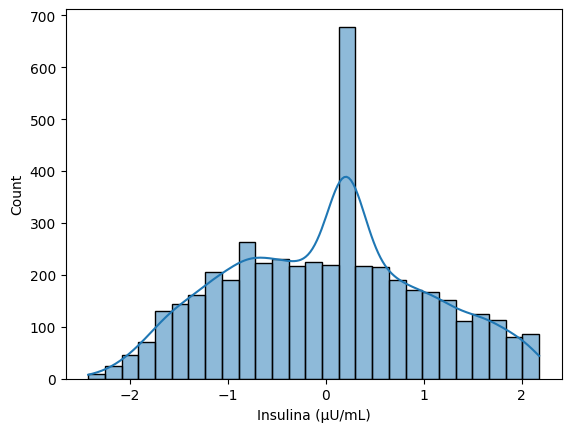

In [19]:
sns.histplot(data=insulina_limpia, x="Insulina (μU/mL)", kde=True)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=85617;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=202345;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

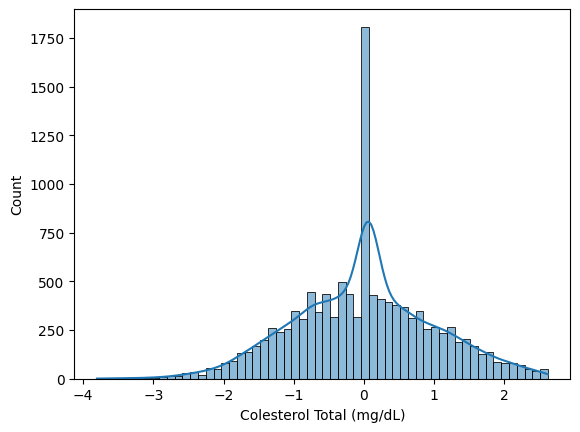

In [20]:
sns.histplot(data=colesterol_limpio, x="Colesterol Total (mg/dL)", kde=True)
plt.show()

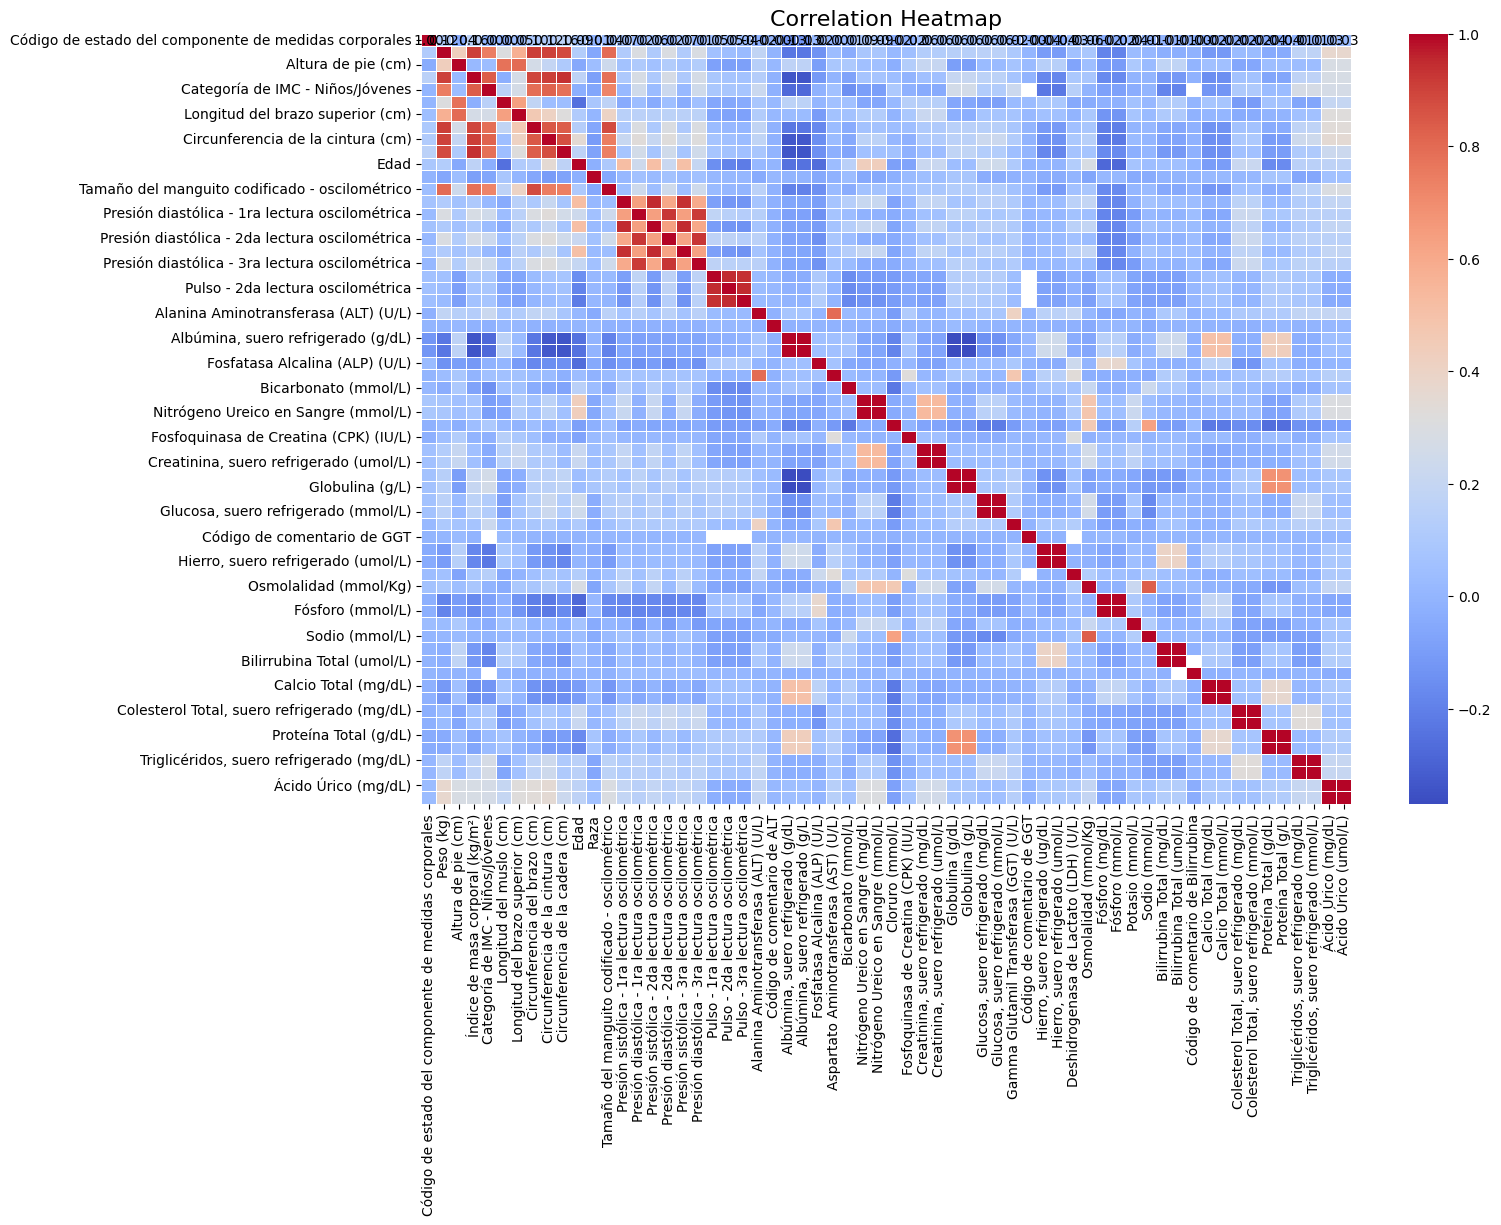

In [21]:
corr_matrix = final.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"color": "black"})

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Fase 4: Modeling

## Fase 5: Evaluation

## Fase 5: Deployment